# Etude de faisabilité moteur de classification partie textuelle

# Importation librairies primaires

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
conda list python

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_6_OC:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9            py38hd77b12b_7  
google-api-python-client  2.108.0                  pypi_0    pypi
ipython                   8.12.2           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
opencv-python-headless    4.8.1.78                 pypi_0    pypi
python                    3.8.18               h1aa4202_0  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.16.2           py38haa95532_0  
python-json-logger        2.0.7            py38haa95532_0  
python-slugify            8.0.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [5]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

# 1) Importation du fichier

In [6]:
# importation dataframe
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [7]:
# 5 premières données
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                                                       product_url  \
0       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   
4            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                                                                                                                                                                                 description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2  Key Features of Eurospa Cotto

In [8]:
# 5 dernières données
df.tail()

uniq_id            crawl_timestamp  \
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                                                                                                          product_url  \
1045                   http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=STIE88ZGTX65GH4V   
1046                                   http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ   
1047  http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5uvggyhfrd4p?pid=STIE5UVGW2JWVWCT   
1048                                  http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE   
1049                                     http://www.flipkart.com/uberlyfe-large-vinyl-sticker/p/itme2zepqqzr9jt5?pid=STIE2ZEPACRQJKH7   

                                                           product_name  \
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

                                                        product_category_tree  \
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]   
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1047      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1049      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   

                   pid  retail_price  discounted_price  \
1045  STIE88ZGTX65GH4V        1399.0             999.0   
1046  STIEC889ZD5GDCVQ        4930.0            1896.0   
1047  STIE5UVGW2JWVWCT        4500.0            1449.0   
1048  STIEC889ZGFD3RCE        3465.0            1333.0   
1049  STIE2ZEPACRQJKH7        1190.0             595.0   

                                     image  is_FK_Advantage_product  \
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg                    False   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg                    False   
1047  5912e037d12774bb73a2048f35a00009.jpg                    False   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg                    False   
1049  f2f027ad6a6df617c9f125173da71e44.jpg                    False   

                                                                                                                                                                                                                                                    description  \
1045  Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n                         Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replac...   
1048                                       

In [9]:
# lignes aléatoires
df.sample(10)

uniq_id            crawl_timestamp  \
181  59af3731b809a25f2bf99e99f645d8dd  2015-12-01 12:40:44 +0000   
788  b5aafdb7cfde56f3e9e1364eb1efb691  2015-12-12 11:46:53 +0000   
364  b4327c9879644be2a04e9b2df963f6cb  2015-12-01 06:13:00 +0000   
673  c997312abfa36281d41366cb4a3b908e  2015-12-31 09:19:31 +0000   
328  7c4c57dda1b2e50f40b331cc8f9d233b  2015-12-01 06:13:00 +0000   
277  113783ce1db999778b5a4bd374e61209  2016-04-24 18:34:50 +0000   
532  64247967cbf6cd8bb2e243ac53aa5928  2016-01-07 05:50:25 +0000   
892  6858fd9265d348803b18667fe43cd054  2015-12-20 08:26:17 +0000   
583  35a68b44bef47a809314493d28535b9d  2016-01-07 05:50:25 +0000   
359  4b0e6f200426b1db8824b2ca0c59ecfa  2015-12-01 06:13:00 +0000   

                                                                                                              product_url  \
181                         http://www.flipkart.com/printland-cmw1670-ceramic-mug/p/itmeacy8fdvfshfn?pid=MUGEACY82GPXUBAC   
788               http://www.flipkart.com/perucci-pc-414w-decker-analog-watch-men/p/itme6xu7j5z95yfu?pid=WATE6XU7T4WYMHVQ   
364                                           http://www.flipkart.com/tenda-fh330/p/itme7dbhgdedvr3v?pid=RTRE7DBH3ZDKADUS   
673                                     http://www.flipkart.com/vrct-5-w-led-bulb/p/itmedpzztufkmbws?pid=BLBEDPZZK4DJYNUM   
328             http://www.flipkart.com/adidas-dynamic-pulse-team-force-combo-set/p/itme6hyj5ymserhc?pid=CAGE6HYJW7VBXDMZ   
277               http://www.flipkart.com/palito-plo-169-analog-watch-girls-women/p/itmehzzsddtpecsz?pid=WATEHZZSSCU4YXYG   
532                           http://www.flipkart.com/hmt-hmtwhq-analog-watch-men/p/itmeckrcka5hs8cd?pid=WATECKRCSC8WGWG5   
892                                  http://www.flipkart.com/mb-cotton-set-towels/p/itmeyfa92urgfe8z?pid=BTWEYFA942QUCJ6Q   
583               http://www.flipkart.com/timewel-1100-n1944-b-analog-watch-women/p/itme2fagcvxsgh8d?pid=WATE2FAGESM5B5VZ   
359  http://www.flipkart.com/park-avenue-believe-spray-four-seasons-edp-combo-set/p/itme9abaays5t7uz?pid=CAGE9ABAW2FEMYCG   

                                              product_name  \
181                          Printland CMW1670 Ceramic Mug   
788         Perucci PC-414W Decker Analog Watch  - For Men   
364                                            Tenda FH330   
673                                      VRCT 5 W LED Bulb   
328          Adidas Dynamic Pulse and Team Force Combo Set   
277        palito PLO 169 Analog Watch  - For Girls, Women   
532                     HMT HMTWHQ Analog Watch  - For Men   
892                                MB Cotton Set of Towels   
583         Timewel 1100-N1944_B Analog Watch  - For Women   
359  Park Avenue Believe Spray ,Four Seasons EDP Combo Set   

                                                                                       product_category_tree  \
181                                             ["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]   
788                                                    ["Watches >> Wrist Watches >> Perucci Wrist Watches"]   
364                                          ["Computers >> Network Components >> Routers >> Tenda Routers"]   
673                                                  ["Kitchen & Dining >> Lighting >> Bulbs >> VRCT Bulbs"]   
328                      ["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Adidas Combos"]   
277  ["Watches >> Wrist Watches >> palito Wrist Watches >> palito PLO 169 Analog Watch  - For Girls, Women"]   
532                                                        ["Watches >> Wrist Watches >> HMT Wrist Watches"]   
892                                                              ["Home Furnishing >> Bath Linen >> Towels"]   
583                                                    ["Watches >> Wrist Watches >> Timewel Wrist Watches"]   
359                 ["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Park Avenue Co

In [10]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [11]:
# valeures uniques
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [12]:
# valeurs nulles
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [13]:
# valeures nulles
df.isnull().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [14]:
# Lignes dupliquées
df.duplicated().sum()

0

In [15]:
# check colonne 
df['product_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64

In [16]:
# check colonne 
df['overall_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: overall_rating, dtype: int64

In [17]:
# check colonne 
df['is_FK_Advantage_product'].value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

In [18]:
# check colonne 
df['brand'].value_counts()

PRINT SHAPES          11
Lapguard              11
Lal Haveli            10
Raymond                8
Aroma Comfort          8
                      ..
Rute                   1
NAMS                   1
JewelKraft Designs     1
Budding Bees           1
Zero                   1
Name: brand, Length: 490, dtype: int64

In [19]:
# check colonne 
df[["description", "product_specifications"]]

description  \
0     Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1     Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2     Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...   
3     Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...   
4     Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...   
...                                                                                                                                                                                                                                                         ...   
1045  Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n                         Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replac...   
1048                                         Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.   
1049                                                                Buy Uberlyfe Large Vinyl Sticker for Rs.595 online. Uberlyfe Large Vinyl Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.   

                                                                                                                                                                                                                                         product_specifications  
0     {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value...  
1     {"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM...  
2     {"product_specification"=>[{"key"=>"Material", "value"=>"Cotton Terry"}, {"key"=>"Design", "value"=>"SHUVAM"}, {"key"=>"Brand", "value"=>"Eurospa"}, {"key"=>"GSM", "value"=>"360"}, {"key"=>"Type", "value"=>"Face Towel Set"}, {"key"=>"Model Name",...  
3     {"product_specification"=>[{"key"=>"Brand", "value"=>"SANTOSH ROYAL FASHION"}, {"key"=>"Machine W

In [20]:
# check colonne 
df['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [21]:
# check colonne 
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [22]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [23]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                                                       product_url  \
0       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   
4            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                                                                                                                                                                                 description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2  Key Features of Eurospa Cotto

In [24]:
# Séléction des colonnes pertinentes
df = df[['product_name','image','product_category_tree','description']]

In [25]:
df

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                                                                                                          product_category_tree  \
0                              ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2      ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3       ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4                ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   
...                                                                                                                                         ...   
1045                                                                    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]   
1046                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1047                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   
1048                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1049                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   

                                                                                                                                                                                                                                                    description  
0     Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...  
1     Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...  
2     Key Features of Eurospa Cotton Terry Face Towel Set Size: sm

In [26]:
# check à nouveau valeur nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
description              0
dtype: int64

# 2) Exploration Data Analyis

In [27]:
import sklearn

In [28]:
import re
import nltk
from sklearn.preprocessing import LabelEncoder

In [29]:
df.head()

product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                                                                                                                                                                                                                                                 description  
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...  
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...  
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...  
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...  
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...

In [30]:
# Extraction des catégories
# Suppression caractères ">>"
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split(">>"))
# Sélèction de la première valeur
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x[0])
# Supression catactères inutiles
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : re.sub("[\"\[]","",x))

In [31]:
# Comptage
df['product_category_tree'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category_tree, dtype: int64

In [32]:
# check valeurs nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
description              0
dtype: int64

In [33]:
# lignes dupliquées
df["description"].duplicated().sum()

0

In [34]:
# longeur descriptions
longueur_list = []
for row in df['description']:
    longueur_list.append(len(row))
df["Longeur_list"] = longueur_list

In [35]:
# Describe
df["Longeur_list"].describe()

count    1050.000000
mean      473.820952
std       457.910422
min       109.000000
25%       192.000000
50%       278.000000
75%       588.250000
max      3490.000000
Name: Longeur_list, dtype: float64

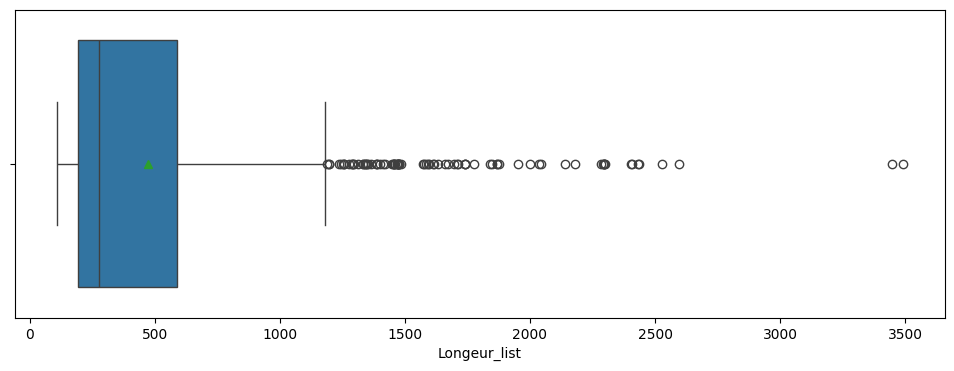

In [36]:
# boxplot longeur des documents du corpus
plt.rcParams['figure.figsize'] = [12,4]
sns.boxplot(x = df['Longeur_list'],showmeans=True)
plt.show()

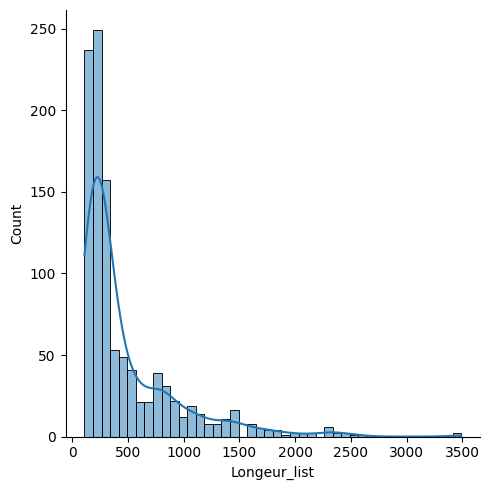

In [37]:
# Distribution
plt.rcParams['figure.figsize'] = [12,6]
sns.displot(x = df['Longeur_list'], kde = True)
plt.show()

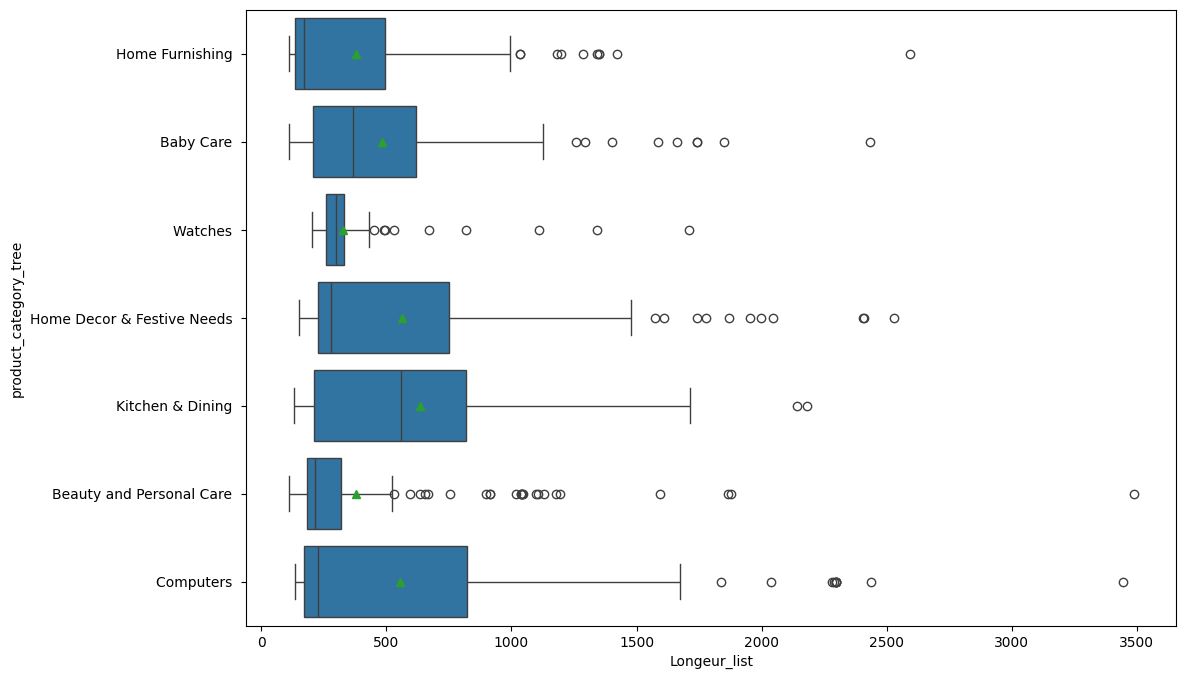

In [38]:
# boxplot longeur des documents du corpus
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(x = df['Longeur_list'], y = df["product_category_tree"], showmeans=True)
plt.show()

In [39]:
df

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

                                     image product_category_tree  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg      Home Furnishing    
1     7b72c92c2f6c40268628ec5f14c6d590.jpg            Baby Care    
2     64d5d4a258243731dc7bbb1eef49ad74.jpg            Baby Care    
3     d4684dcdc759dd9cdf41504698d737d8.jpg      Home Furnishing    
4     6325b6870c54cd47be6ebfbffa620ec7.jpg      Home Furnishing    
...                                    ...                   ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg            Baby Care    
1046  fd6cbcc22efb6b761bd564c28928483c.jpg            Baby Care    
1047  5912e037d12774bb73a2048f35a00009.jpg            Baby Care    
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg            Baby Care    
1049  f2f027ad6a6df617c9f125173da71e44.jpg            Baby Care    

                                                                                                                                                                                                                                                    description  \
0     Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1     Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2     Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...   
3     Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...   
4     Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...   
...                                                                                                                                                                                                                                                         ...   
1045  Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n                         Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...   
1047  Buy 

In [40]:
# encodage des catégories avec label encoder

le = LabelEncoder()
df["label_categories"] = le.fit_transform(df["product_category_tree"])
df.head()

product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                  image product_category_tree  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg      Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590.jpg            Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74.jpg            Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8.jpg      Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7.jpg      Home Furnishing    

                                                                                                                                                                                                                                                 description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...   

   Longeur_list  label_categories  
0          1420                 4  
1           444                 0  
2          1258                 0  
3           858                 4  
4          1197                 4

In [41]:
# corrélations
df.corr()

Longeur_list  label_categories
Longeur_list          1.000000         -0.020285
label_categories     -0.020285          1.000000

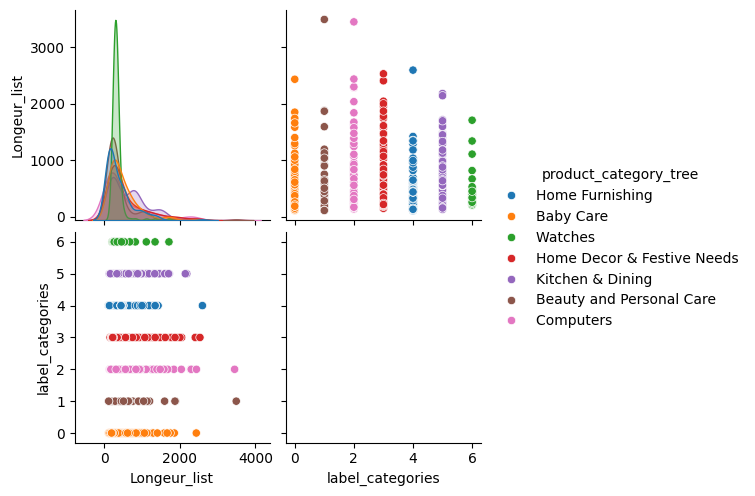

In [42]:
# pair_plot et corrélations
plt.rcParams['figure.figsize'] = [12,16]
sns.pairplot(df, hue = "product_category_tree")

# 3) Text Processing

In [43]:
# NLP
import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


# Visualisation
from wordcloud import WordCloud
from PIL import Image

# si besoin travail sur plusieurs processeurs
from pandarallel import pandarallel

In [44]:
# initialisation pandarallel

pandarallel.initialize(progress_bar = True, nb_workers = 6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [45]:
df.head()

product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                  image product_category_tree  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg      Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590.jpg            Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74.jpg            Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8.jpg      Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7.jpg      Home Furnishing    

                                                                                                                                                                                                                                                 description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...   

   Longeur_list  label_categories  
0          1420                 4  
1           444                 0  
2          1258                 0  
3           858                 4  
4          1197                 4

## 3.1) Préparation de la fonction

In [46]:
# préparation de la fonction

doc = df['description'][0]
doc

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [47]:
len(doc)

1420

In [48]:
# lower
doc = doc.lower().strip()
doc

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so that you

In [49]:
len(doc)

1420

In [50]:
# tokenize_classique
nltk.download('punkt')
word_tokenize(doc)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['key',
 'features',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 ',',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '(',
 '213',
 'cm',
 'in',
 'height',
 ',',
 'pack',
 'of',
 '2',
 ')',
 'price',
 ':',
 'rs',
 '.',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.it',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring.it',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.this',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 '.',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 '.',
 

In [51]:
len(word_tokenize(doc))

247

In [52]:
# tokenize
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
tokens

['key',
 'features',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'in',
 'height',
 'pack',
 'of',
 '2',
 'price',
 'rs',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'it',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring',
 'it',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'this',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'these',
 'contemporary',
 'eyelet'

In [53]:
len(tokens)

236

In [54]:
# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'these', 'off', 'can', 'nor', "that'll", 'why', 'aren', 'in', 'he', "you'll", 'didn', 'doesn', 't', 'won', 'mightn', "won't", 'me', 'yourselves', 'from', 'other', 'while', 'this', 'over', 'only', 'under', 'she', 'they', "should've", "isn't", 'because', 'so', "wasn't", "couldn't", 'being', 'myself', "hadn't", "wouldn't", 'down', 'yourself', 'does', 'by', 'theirs', 'after', 'your', 'had', 'now', 'what', 'and', 'don', 'haven', 'just', 'shouldn', 'you', 'm', 'during', 'than', 'out', 'if', 'those', 'an', 'about', 'into', 'y', 'having', 'were', 'that', 'been', 'has', 'are', 'against', 'when', 'all', "she's", 'there', 'more', 'them', 'mustn', 'below', 'up', 'be', 'own', 'his', 'we', 'ourselves', 'was', "hasn't", "you're", 'hers', 'above', 'where', 'which', 'any', 'too', 'further', 'ours', 'hadn', 'to', 'am', 'some', "doesn't", 'weren', "aren't", 'the', 'couldn', 'both', "you've", 'isn', 'herself', 'at', 'before', 'needn', 'through', 'it', "needn't", "mightn't", 'no', 'did', 'hasn', 'whom', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# traitement des stops words
tokens = [T for T in tokens if T not in stop_words]
tokens

['key',
 'features',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'rs',
 '899',
 'curtain',
 'enhances',
 'look',
 'interiors',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'features',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'makes',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'designs',
 'surreal',
 'attention',
 'sure',
 'steal',
 'hearts',
 'contemporary',
 'eyelet',
 'valance',
 'curtains',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'rays',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create

In [56]:
len(tokens)

162

In [57]:
# caractères numériques
tokens = [t for t in tokens if t.isalpha()]

In [58]:
len(tokens)

151

In [59]:
# stemmer ==> racinisation
trans = PorterStemmer()
trans_stem = [trans.stem(i) for i in tokens]
print(trans_stem)

['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'rs', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest', 'fabric', 'featur', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environ', 'romant', 'love', 'curtain', 'ant', 'wrinkl', 'anti', 'shrinkag', 'eleg', 'appar', 'give', 'home', 'bright', 'modernist', 'appeal', 'design', 'surreal', 'attent', 'sure', 'steal', 'heart', 'contemporari', 'eyelet', 'valanc', 'curtain', 'slide', 'smoothli', 'draw', 'apart', 'first', 'thing', 'morn', 'welcom', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morn', 'whole', 'world', 'draw', 'close', 'even', 'creat', 'special', 'moment', 'joyou', 'beauti', 'given', 'sooth', 'print', 'bring', 'home', 'eleg', 'curtain', 'softli', 'filter', 'light', 'room', 'get', 'right', 'amount', 'sunlig

In [60]:
# lemmatizer ==> forme canninique (masculin, singulier, infinitif)
nltk.download('wordnet')
trans = WordNetLemmatizer()
trans_lem = [trans.lemmatize(i) for i in tokens]
print(trans_lem)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'r', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'f

In [61]:
len(tokens)

151

In [62]:
# Préférence pour le lemmatizer

In [63]:
# dictionnaire anglais
nltk.download('words')
eng_words = [w.lower() for w in words.words()]
eng_words = [trans.lemmatize(i) for i in eng_words]

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ARMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [64]:
# liste d'élements à suuprimmer ==> commercial
list_com_word = ["product","free", "discount", "shipping", "guarantee", "genuine", "delivery", "buy", "cash", "day","price","sale"]
# liste d'élements à suuprimmer ==> Autres mots
list_other_word = ["ml", "cm","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

In [65]:
# fonction n°1

def clean_normalize(df,col, join = False):
    for i in df.index.to_list() :
        doc = df[col][i]
        # lower
        doc = doc.lower().strip()
        # tokenize
        tokenizer = RegexpTokenizer(r"\w+")
        tokens = tokenizer.tokenize(doc)
        # stopwords
        stop_words = set(stopwords.words('english'))
        # traitement des stops words
        tokens = [T for T in tokens if T not in stop_words]
        # traitement des caractères numériques
        tokens = [t for t in tokens if t.isalpha()]
        # lemmatizer ==> forme canninique (masculin, singulier, infinitif)
        trans = WordNetLemmatizer()
        tokens = [trans.lemmatize(i) for i in tokens]
        # mots commerciaux
        tokens = [t for t in tokens if t not in list_com_word]
        # Autres mots
        tokens = [t for t in tokens if t not in list_other_word]
        # English words
        tokens = [t for t in tokens if t in eng_words]
        if join == True :
            df[col][i] = " ".join(tokens)
        else :
            df[col][i] = tokens

In [66]:
# Fonction pour les corpus

def corpus(df,num_label_categories) :
    df = df[df["label_categories"] == num_label_categories]
    docs_list = [doc for doc in df["description"]]
    corpus = " ".join(docs_list)
    return(corpus)

## 3.2)  Nettoyage et Normalisation

In [67]:
df = df.copy()

In [68]:
clean_normalize(df,"description", join = True)

C:\Users\ARMAN\AppData\Local\Temp\ipykernel_17328\2851707611.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = " ".join(tokens)


In [69]:
df.head()

product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                  image product_category_tree  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg      Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590.jpg            Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74.jpg            Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8.jpg      Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7.jpg      Home Furnishing    

                                                                                                                                                                                                                                                 description  \
0  key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack curtain look interior curtain made high quality polyester fabric feature eyelet style sti...   
1  specification cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand type bath towel model name cotton bath towel ideal men woman boy girl model id color red yellow bl...   
2  key feature cotton terry face towel set size small height inch cotton terry face towel set piece face towel set assorted exclusively designed soft cotton towel export quality soft texture take care skin give feeling deserve bath towel lot renowne...   
3  key feature royal fashion cotton printed king sized double royal wedding specification royal fashion cotton printed king sized double pillow cover multicolor general brand royal fashion machine washable yes type flat material cotton model name go...   
4  key feature print cotton floral king sized double cotton print cotton floral king sized double bed sheet pillow cover white nice bed sheet made cotton give comfort bed sheet hand printed give nice look room fast colour good quality give long life...   

   Longeur_list  label_categories  
0          1420                 4  
1           444                 0  
2          1258                 0  
3           858                 4  
4          1197                 4

In [70]:
df["product_category_tree"].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

## 3.3)  Bags of words

### 3.3.1) Approche Fréquence

#### bow_baby_care

In [71]:
# Liste corpus
bow_baby_care_list = " ".join(df[df["product_category_tree"] == "Baby Care "]["description"]).split(" ")

In [72]:
# longueur
len(bow_baby_care_list)

7387

In [73]:
bow_baby_care_series = pd.Series(bow_baby_care_list)
# Comptage de la fréquence des mots
bow_baby_care_series.value_counts()
# Top 20
bow_baby_care_series.value_counts()[0:20]

baby             317
girl             197
cotton           191
detail           180
fabric           164
boy              112
dress            105
specification    100
ideal             98
general           96
package           88
feature           87
sleeve            86
type              85
color             81
neck              80
wash              77
number            76
pattern           75
pack              74
dtype: int64

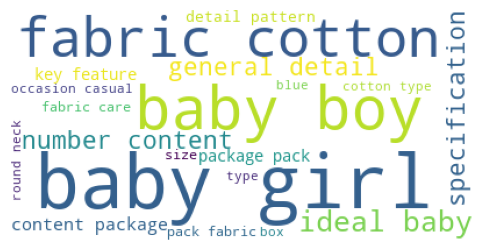

In [74]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_baby_care_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Beauty_and_Personal_Care

In [75]:
# Liste corpus
bow_Beauty_and_Personal_Care_list = " ".join(df[df["product_category_tree"] == "Beauty and Personal Care "]["description"]).split(" ")

In [76]:
# longueur
len(bow_Beauty_and_Personal_Care_list)

4054

In [77]:
bow_Beauty_and_Personal_Care_series = pd.Series(bow_Beauty_and_Personal_Care_list)
# Comptage de la fréquence des mots
bow_Beauty_and_Personal_Care_series.value_counts()
# Top 20
bow_Beauty_and_Personal_Care_series.value_counts()[0:20]

set              112
replacement      105
skin              69
box               52
hair              52
type              47
oil               44
color             42
trait             42
soap              41
specification     40
body              35
pack              30
lip               28
ideal             28
feature           27
cream             27
conditioner       26
care              26
best              25
dtype: int64

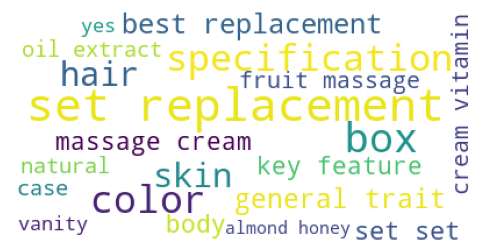

In [78]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Beauty_and_Personal_Care_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Computers

In [79]:
# Liste corpus
bow_Computers_list = " ".join(df[df["product_category_tree"] == "Computers "]["description"]).split(" ")

In [80]:
# longueur
len(bow_Computers_list)

6154

In [81]:
bow_Computers_series = pd.Series(bow_Computers_list)
# Comptage de la fréquence des mots
bow_Computers_series.value_counts()
# Top 20
bow_Computers_series.value_counts()[0:20]

replacement      176
warranty         161
adapter          131
battery          110
power            101
quality           90
skin              82
light             68
feature           64
charger           62
brand             61
specification     60
model             58
print             55
size              52
shape             52
type              51
led               49
pad               47
mouse             46
dtype: int64

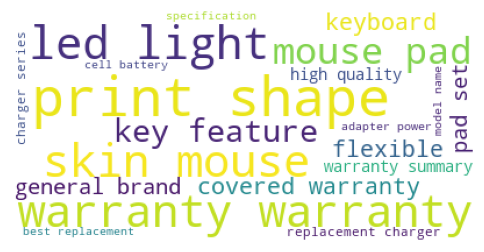

In [82]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Computers_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Home_Decor_Festive_Needs

In [83]:
# Liste corpus
bow_Home_Decor_Festive_Needs_list = " ".join(df[df["product_category_tree"]
                                                == "Home Decor & Festive Needs "]["description"]).split(" ")

In [84]:
# longueur
len(bow_Home_Decor_Festive_Needs_list)

6709

In [85]:
bow_Home_Decor_Festive_Needs_series = pd.Series(bow_Home_Decor_Festive_Needs_list)
# Comptage de la fréquence des mots
bow_Home_Decor_Festive_Needs_series.value_counts()
# Top 20
bow_Home_Decor_Festive_Needs_series.value_counts()[0:20]

showpiece      204
best            87
inch            83
wall            79
home            76
replacement     76
color           71
brass           63
feature         63
number          57
gift            54
box             51
material        51
dimension       50
art             49
beautiful       48
package         47
key             45
design          44
model           44
dtype: int64

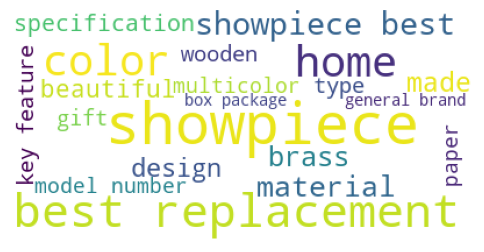

In [86]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Home_Decor_Festive_Needs_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Home_Furnishing

In [87]:
# Liste corpus
bow_Home_Furnishing_list = " ".join(df[df["product_category_tree"] == "Home Furnishing "]["description"]).split(" ")

In [88]:
# longueur
len(bow_Home_Furnishing_list)

4925

In [89]:
bow_Home_Furnishing_series = pd.Series(bow_Home_Furnishing_list)
# Comptage de la fréquence des mots
bow_Home_Furnishing_series.value_counts()
# Top 20
bow_Home_Furnishing_series.value_counts()[0:20]

cotton           103
cover            101
pack              88
design            79
towel             74
cushion           70
color             66
package           63
inch              63
polyester         61
material          58
single            57
feature           55
multicolor        54
curtain           53
width             49
blanket           48
brand             47
specification     47
dimension         47
dtype: int64

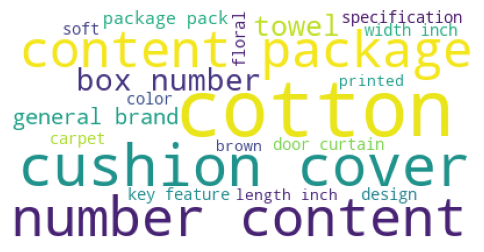

In [90]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Home_Furnishing_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Kitchen_Dining

In [91]:
# Liste corpus
bow_Kitchen_Dining_list = " ".join(df[df["product_category_tree"] == "Kitchen & Dining "]["description"]).split(" ")

In [92]:
# longueur
len(bow_Kitchen_Dining_list)

7902

In [93]:
bow_Kitchen_Dining_series = pd.Series(bow_Kitchen_Dining_list)
# Comptage de la fréquence des mots
bow_Kitchen_Dining_series.value_counts()
# Top 20
bow_Kitchen_Dining_series.value_counts()[0:20]

mug              453
ceramic          206
coffee           161
perfect          143
material         119
design           116
gift             109
one              104
feature           93
specification     84
safe              81
give              74
quality           72
pack              72
best              65
come              60
kitchen           58
microwave         57
tea               57
bottle            56
dtype: int64

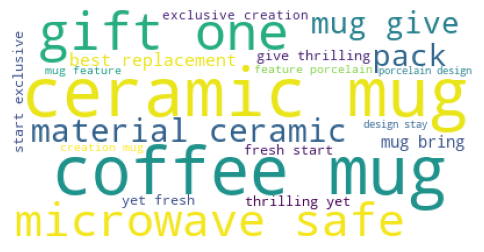

In [94]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Kitchen_Dining_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### bow_Watches

In [95]:
# Liste corpus
bow_Watches_list = " ".join(df[df["product_category_tree"] == "Watches "]["description"]).split(" ")

In [96]:
# longueur
len(bow_Watches_list)

2845

In [97]:
bow_Watches_series = pd.Series(bow_Watches_list)
# Comptage de la fréquence des mots
bow_Watches_series.value_counts()
# Top 20
bow_Watches_series.value_counts()[0:20]

watch          349
men            158
india          134
great          134
replacement    134
woman          111
dial            90
strap           79
boy             67
resistant       51
water           51
round           50
sonata          47
maximum         46
digital         43
girl            37
case            34
clasp           31
color           29
black           28
dtype: int64

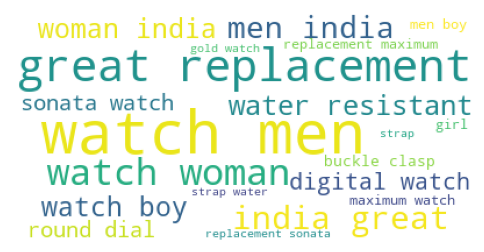

In [98]:
# WordCloud
plt.rcParams["figure.figsize"] = [6,6]
wordcloud = WordCloud(background_color = 'white',
                     max_words = 20, random_state = 0).generate(" ".join(bow_Watches_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Transformation vectorielle avec comptage

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
# assignation
count_vectorizer = CountVectorizer()

In [101]:
# transformation
count_bow = count_vectorizer.fit_transform(df["description"])

In [102]:
# dataframe
df_count_bow = pd.DataFrame(count_bow.toarray(), columns = count_vectorizer.get_feature_names_out())
df_count_bow

aa  ability  able  abode  abrasion  abroad  absolute  absorbency  \
0      0        0     0      0         0       0         0           0   
1      0        0     0      0         0       0         0           0   
2      0        0     0      0         0       0         0           1   
3      0        0     0      0         0       0         0           0   
4      0        0     0      0         0       0         0           0   
...   ..      ...   ...    ...       ...     ...       ...         ...   
1045   0        0     0      0         0       0         0           0   
1046   0        0     0      0         0       0         0           0   
1047   0        0     0      0         0       0         0           0   
1048   0        0     0      0         0       0         0           0   
1049   0        0     0      0         0       0         0           0   

      absorbent  absorber  absorbing  abstract  accent  access  accessory  \
0             0         0          0         4       0       0          0   
1             0         0          0         0       0       0          0   
2             0         0          0         0       0       0          0   
3             0         0          0         0       0       0          0   
4             0         0          0         0       0       0          0   
...         ...       ...        ...       ...     ...     ...        ...   
1045          0         0          0         0       0       0          0   
1046          0         0          0         0       0       0          0   
1047          0         0          0         0       0       0          0   
1048          0         0          0         0       0       0          0   
1049          0         0          0         0       0       0          0   

      accident  accidental  accommodate  according  acer  ache  aching  acid  \
0            0           0            0          0     0     0       0     0   
1            0           0            0          0     0     0       0     0   
2            0           0            0          0     0     0       0     0   
3            0           0            0          0     0     0       0     0   
4            0           0            0          0     0     0       0     0   
...        ...         ...          ...        ...   ...   ...     ...   ...   
1045         0           0            0          0     0     0       0     0   
1046         0           0            0          0     0     0       0     0   
1047         0           0            0          0     0     0       0     0   
1048         0           0            0          0     0     0       0     0   
1049         0           0            0          0     0     0       0     0   

      acne  across  acrylic  act  active  actual  adapter  adaptor  add  \
0        0       0        0    0       0       0        0        0    0   
1        0       0        0    0       0       0        0        0    0   
2        0       0        0    0       0       0        0        0    0   
3        0       0        0    0       0       0        0        0    0   
4        0       0        0    0       0       0        0        0    0   
...    ...     ...      ...  ...     ...     ...      ...      ...  ...   
1045     0       0        0    0       0       0        0        0    0   
1046     0       0        0    0       0       0        0        0    0   
1047     0       0        0    0       0       0        0        0    0   
1048     0       0        0    0       0       0        0        0    0   
1049     0       0        0    0       0       0        0        0    0   

      added  addiction  addition  additional  additionally  adhesive  adjust  \
0         0          0         0           0             0         0       0   
1         0          0         0           0             0         0       0   
2         0          0         0           0             0         0       0   
3         

In [103]:
from sklearn.decomposition import PCA

In [104]:
# PCA pour simplification
pca = PCA()
pca.fit(df_count_bow)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[6.92812975e+00 5.51644644e+00 4.69305563e+00 ... 1.53467183e-32
 7.21091590e-33 9.04270221e-34]
[7.03460277e-02 5.60122440e-02 4.76517954e-02 ... 1.55825700e-34
 7.32173484e-35 9.18167245e-36]


In [105]:
len(pca.explained_variance_ratio_)

1050

In [106]:
# dataframe ratio_var
cumul_ratio_var = pd.DataFrame({"variance_ratio" : pca.explained_variance_ratio_})
# ratio cumulé
cumul_ratio_var["cumul"] = cumul_ratio_var["variance_ratio"].cumsum()
cumul_ratio_var = cumul_ratio_var*100
# 90% de variance
cumul_ratio_var[cumul_ratio_var["cumul"] <=90]

variance_ratio      cumul
0          7.034603   7.034603
1          5.601224  12.635827
2          4.765180  17.401007
3          3.154032  20.555038
4          2.397884  22.952922
5          2.237122  25.190044
6          2.090738  27.280782
7          1.827606  29.108388
8          1.776739  30.885127
9          1.675018  32.560145
10         1.587634  34.147779
11         1.498577  35.646356
12         1.415368  37.061724
13         1.297974  38.359698
14         1.259337  39.619036
15         1.220481  40.839517
16         1.117644  41.957161
17         1.053498  43.010659
18         1.007356  44.018015
19         0.994211  45.012226
20         0.923656  45.935882
21         0.921004  46.856885
22         0.897467  47.754352
23         0.867397  48.621749
24         0.838567  49.460316
25         0.778131  50.238446
26         0.756926  50.995373
27         0.744055  51.739428
28         0.735981  52.475409
29         0.728123  53.203532
30         0.709391  53.912924
31         0.664270  54.577193
32         0.661610  55.238803
33         0.634403  55.873206
34         0.618232  56.491438
35         0.606044  57.097482
36         0.595217  57.692699
37         0.584673  58.277372
38         0.570419  58.847790
39         0.557561  59.405351
40         0.535123  59.940475
41         0.521548  60.462022
42         0.513296  60.975318
43         0.511773  61.487091
44         0.488574  61.975666
45         0.472630  62.448295
46         0.468750  62.917045
47         0.460383  63.377428
48         0.451205  63.828633
49         0.445903  64.274536
50         0.435527  64.710063
51         0.432715  65.142778
52         0.424554  65.567332
53         0.410355  65.977688
54         0.400116  66.377804
55         0.387541  66.765345
56         0.384172  67.149517
57         0.382158  67.531675
58         0.373252  67.904927
59         0.371364  68.276291
60         0.359890  68.636181
61         0.354563  68.990743
62         0.351271  69.342015
63         0.343587  69.685602
64         0.342322  70.027924
65         0.330696  70.358620
66         0.322807  70.681427
67         0.318616  71.000043
68         0.317320  71.317363
69         0.312287  71.629650
70         0.308883  71.938534
71         0.304117  72.242651
72         0.300392  72.543042
73         0.294960  72.838003
74         0.293352  73.131355
75         0.291941  73.423296
76         0.287345  73.710640
77         0.277352  73.987992
78         0.274774  74.262766
79         0.273483  74.536250
80         0.269280  74.805530
81         0.266064  75.071594
82         0.263202  75.334796
83         0.258546  75.593342
84         0.253920  75.847262
85         0.251167  76.098429
86         0.249522  76.347952
87         0.247379  76.595331
88         0.240791  76.836122
89         0.236193  77.072315
90         0.235700  77.308014
91         0.233234  77.541248
92         0.230287  77.771535
93         0.228694  78.000229
94         0.225436  78.225664
95         0.222034  78.447698
96         0.220781  78.668479
97         0.218223  78.886701
98         0.212784  79.099485
99         0.211243  79.310729
100        0.208260  79.518989
101        0.205749  79.724737
102        0.204546  79.929284
103        0.201911  80.131195
104        0.201853  80.333048
105        0.197866  80.530914
106        0.195166  80.726080
107        0.191530  80.917610
108        0.188562  81.106172
109        0.187960  81.294132
110        0.187253  81.481385
111        0.184808  81.666194
112        0.182494  81.848687
113        0.180870  82.029558
114        0.177076  82.206634
115        0.174578  82.381212
116        0.174452  82.555664
117        0.172083  82.727747
118        0.170327  82.898074
119        0.167826  83.065900
120        0.167319  83.233219
121        0.164196  83.397415
122        0.160870  83.558285
123        0.157503  83.715788
124        0.155771  83.871559
125        0.153645  84.025204
126        0.152892  84.178097
127        0.151626  84.329723
128   

#### Réduction de dimension PCA

In [107]:
# PCA final 90% de variance
pca = PCA(175)
pca.fit_transform(df_count_bow)

array([[ 0.72269129,  3.91572954, -1.90127785, ..., -0.03901504,
        -0.32307537,  0.77238087],
       [-0.5150328 ,  2.60702412, -2.24049186, ..., -0.5643443 ,
         0.14712081, -0.15190796],
       [-0.37656878,  6.32364928, -3.73803298, ..., -0.22609218,
        -0.6057859 , -0.34660831],
       ...,
       [-0.75399524, -1.37795656,  0.57095699, ..., -0.16077878,
         0.21001303,  0.22957466],
       [-0.76657365, -1.31224494,  0.55229361, ..., -0.37622068,
         0.1735258 ,  0.15029746],
       [-0.7571184 , -1.34457664,  0.56873261, ..., -0.19970958,
         0.21145734,  0.16834142]])

In [108]:
# dataframe PCA
df_pca = pd.DataFrame(pca.fit_transform(df_count_bow))
df_pca

0         1         2         3         4         5         6    \
0     0.722691  3.915730 -1.901278 -2.982565 -1.826933  1.367269 -0.969181   
1    -0.515033  2.607024 -2.240492 -0.840572 -0.114642  0.613895 -0.850090   
2    -0.376569  6.323649 -3.738033 -2.299977  2.589680  0.944397 -0.013892   
3    -0.532924  5.554106 -3.920385 -2.417254 -0.179270  3.099328 -4.757261   
4    -0.198885  7.635413 -4.320465 -3.352976  0.621121  3.866656 -5.671419   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.171597  1.792057  0.004708 -4.280357 -3.670008  1.437404 -0.753260   
1046  1.301089  2.767734  0.051258 -4.779906 -0.845528  2.923166  1.055228   
1047 -0.753995 -1.377957  0.570957 -0.097940 -0.115559  0.046516 -0.095808   
1048 -0.766574 -1.312245  0.552294 -0.284766 -0.244976 -0.011514 -0.160438   
1049 -0.757118 -1.344577  0.568733 -0.172266 -0.094423 -0.023845 -0.124215   

            7         8          9         10        11        12        13   \
0      1.272217  0.008216  -1.085526 -2.384234  0.209445 -1.238010  0.609064   
1     -1.365239 -0.262168  -0.298194 -0.152187 -0.879127  2.430823 -2.443022   
2     -3.275561 -0.094478   0.347676 -0.575955 -1.197121  4.932337 -7.525056   
3     -8.156586  0.136640   1.100427  1.392698 -2.248959  1.465754  2.177697   
4    -10.229254  0.304483   2.234371  2.718312 -2.415065  2.247999  1.783117   
...         ...       ...        ...       ...       ...       ...       ...   
1045  11.393959 -1.449602  11.219333  7.813812 -8.859313  2.904984  0.195586   
1046   4.532250 -1.440237   8.744288  4.800065 -2.845477  0.133518 -0.173377   
1047   0.269829 -0.071246   0.916749 -0.098573 -0.607706  0.100453  0.079536   
1048   0.822829 -0.165215   1.345306  0.261310 -1.235690  0.166444  0.124857   
1049   0.358808 -0.102899   0.999187 -0.000197 -0.786901  0.016974  0.141487   

           14        15        16        17        18        19        20   \
0    -0.095036 -0.535981 -5.329957 -2.297390  3.217429 -2.415198 -5.800660   
1    -1.430788  2.573470 -2.379867  3.127168 -1.229556 -2.753671 -0.415168   
2    -2.149042  8.000406 -0.939629  3.587687 -0.837175 -3.594872 -0.458049   
3     1.559522 -0.343772 -0.240615 -1.313986 -2.129952  1.165805  1.203986   
4     1.596991 -1.019311  2.570216 -0.267431 -2.220635  1.004456  0.861819   
...        ...       ...       ...       ...       ...       ...       ...   
1045  1.798904  2.194821  2.987263  0.801807 -1.325042  4.402487  1.022289   
1046 -0.421665  0.090736 -0.268988 -0.963977  0.119512 -0.152958 -0.925573   
1047  0.276032 -0.212354 -0.032289  0.211473  0.004100  0.378546  0.171520   
1048  0.431861 -0.105532 -0.069130  0.299177  0.059604  0.392032  0.109778   
1049  0.280576 -0.160374  0.002273  0.266503  0.019432  0.323700  0.138415   

           21        22        23        24        25        26        27   \
0     0.545842  6.508861  1.621961 -0.670298  2.328786 -4.386947  3.276399   
1     0.944008 -1.100367  0.450087 -2.256928  0.642483  0.819572 -0.706969   
2     1.207734 -1.870463  0.230248 -2.190962 -1.336688  1.182006  0.861856   
3    -1.422314  0.153275 -0.910027 -0.609235  0.330403 -0.560718 -0.971246   
4    -1.753474  1.512318 -0.548876  0.406625  1.092230 -1.351038  0.512675   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.013531 -0.088746  0.657257 -1.421232 -1.446156 -2.105338  0.384182   
1046  0.374863 -1.012111  1.512503  0.092155 -0.893107  0.143262  2.096059   
1047  0.236800 -0.041048 -0.083165  0.214224  0.269857  0.098571 -0.177923   
1048  0.335257 -0.040818 -0.058689  0.361508  0.308131  0.252494 -0.195035   
1049  0.247489 -0.056882 -0.048589  0.240805  0.246889  0.112343 -0.160763   

           28        29        30        31        32        33        34   \
0    -2.587558 -0.644083 -0.418183 -1.907983 -1.005350  1.053157 -2.084847   
1    -1.292013  0.155848 -1.087993  0.598384  0.343329  0.916382 -0.217041   
2    

In [109]:
# dataframe pcA df_count_bow
df_count_bow_pca = df.merge(df_pca, left_index = True,  right_index = True)
df_count_bow_pca = df_count_bow_pca.drop(["description", "Longeur_list", "image"], axis = 1)

In [110]:
df_count_bow_pca

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories         0         1         2  \
0         Home Furnishing                  4  0.722691  3.915730 -1.901278   
1               Baby Care                  0 -0.515033  2.607024 -2.240492   
2               Baby Care                  0 -0.376569  6.323649 -3.738033   
3         Home Furnishing                  4 -0.532924  5.554106 -3.920385   
4         Home Furnishing                  4 -0.198885  7.635413 -4.320465   
...                    ...               ...       ...       ...       ...   
1045            Baby Care                  0 -0.171597  1.792057  0.004708   
1046            Baby Care                  0  1.301089  2.767734  0.051258   
1047            Baby Care                  0 -0.753995 -1.377957  0.570957   
1048            Baby Care                  0 -0.766574 -1.312245  0.552294   
1049            Baby Care                  0 -0.757118 -1.344577  0.568733   

             3         4         5         6          7         8          9  \
0    -2.982565 -1.826933  1.367269 -0.969181   1.272217  0.008216  -1.085526   
1    -0.840572 -0.114642  0.613895 -0.850090  -1.365239 -0.262168  -0.298194   
2    -2.299977  2.589680  0.944397 -0.013892  -3.275561 -0.094478   0.347676   
3    -2.417254 -0.179270  3.099328 -4.757261  -8.156586  0.136640   1.100427   
4    -3.352976  0.621121  3.866656 -5.671419 -10.229254  0.304483   2.234371   
...        ...       ...       ...       ...        ...       ...        ...   
1045 -4.280357 -3.670008  1.437404 -0.753260  11.393959 -1.449602  11.219333   
1046 -4.779906 -0.845528  2.923166  1.055228   4.532250 -1.440237   8.744288   
1047 -0.097940 -0.115559  0.046516 -0.095808   0.269829 -0.071246   0.916749   
1048 -0.284766 -0.244976 -0.011514 -0.160438   0.822829 -0.165215   1.345306   
1049 -0.172266 -0.094423 -0.023845 -0.124215   0.358808 -0.102899   0.999187   

            10        11        12        13        14        15        16  \
0    -2.384234  0.209445 -1.238010  0.609064 -0.095036 -0.535981 -5.329957   
1    -0.152187 -0.879127  2.430823 -2.443022 -1.430788  2.573470 -2.379867   
2    -0.575955 -1.197121  4.932337 -7.525056 -2.149042  8.000406 -0.939629   
3     1.392698 -2.248959  1.465754  2.177697  1.559522 -0.343772 -0.240615   
4     2.718312 -2.415065  2.247999  1.783117  1.596991 -1.019311  2.570216   
...        ...       ...       ...       ...       ...       ...       ...   
1045  7.813812 -8.859313  2.904984  0.195586  1.798904  2.194821  2.987263   
1046  4.800065 -2.845477  0.133518 -0.173377 -0.421665  0.090736 -0.268988   
1047 -0.098573 -0.607706  0.100453  0.079536  0.276032 -0.212354 -0.032289   
1048  0.261310 -1.235690  0.166444  0.124857  0.431861 -0.105532 -0.069130   
1049 -0.000197 -0.786901  0.016974  0.141487  0.280576 -0.160374  0.002273   

            17        18        19        20        21        22        23  \
0    -2.297390  3.217429 -2.415198 -5.800660  0.545842  6.508861  1.621961   
1     3.127168 -1.229556 -2.753671 -0.415168  0.944008 -1.100367  0.450087   
2     3.587687 -0.837175 -3.594872 -0.458049  1.207734 -1.870463  0.230248   
3    -1.313

#### Réduction T-SNE

In [111]:
from sklearn import manifold

In [112]:
# Mise en place TSNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(df_pca)

In [113]:
X_tsne 

array([[-22.189178,   5.439488],
       [  8.577176, -24.776266],
       [  4.698906, -26.46304 ],
       ...,
       [-24.642933,  22.478403],
       [-26.223888,  21.566828],
       [-24.668108,  22.210226]], dtype=float32)

In [114]:
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne

tsne1      tsne2
0    -22.189178   5.439488
1      8.577176 -24.776266
2      4.698906 -26.463039
3      4.732044 -11.219015
4      4.502616 -10.727151
...         ...        ...
1045 -27.745249  16.446154
1046 -26.730057  18.807478
1047 -24.642933  22.478403
1048 -26.223888  21.566828
1049 -24.668108  22.210226

[1050 rows x 2 columns]

In [115]:
df_tsne = df.merge(df_tsne, left_index = True,  right_index = True)

In [116]:
df_tsne = df_tsne.drop(["description", "Longeur_list", "image"], axis = 1)

In [117]:
df_tsne

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories      tsne1      tsne2  
0         Home Furnishing                  4 -22.189178   5.439488  
1               Baby Care                  0   8.577176 -24.776266  
2               Baby Care                  0   4.698906 -26.463039  
3         Home Furnishing                  4   4.732044 -11.219015  
4         Home Furnishing                  4   4.502616 -10.727151  
...                    ...               ...        ...        ...  
1045            Baby Care                  0 -27.745249  16.446154  
1046            Baby Care                  0 -26.730057  18.807478  
1047            Baby Care                  0 -24.642933  22.478403  
1048            Baby Care                  0 -26.223888  21.566828  
1049            Baby Care                  0 -24.668108  22.210226  

[1050 rows x 5 columns]

#### Classification selon vraies catégories

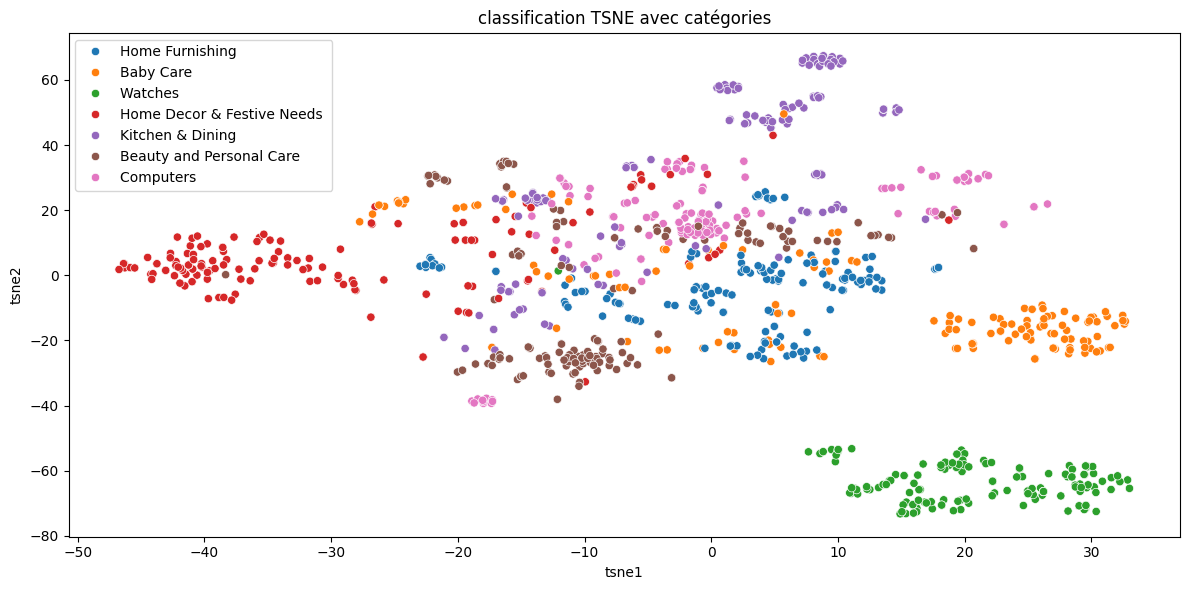

In [118]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

#### Classification avec KMEANS

In [119]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [120]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100)

In [121]:
df_tsne["clusters"] = kmeans.labels_

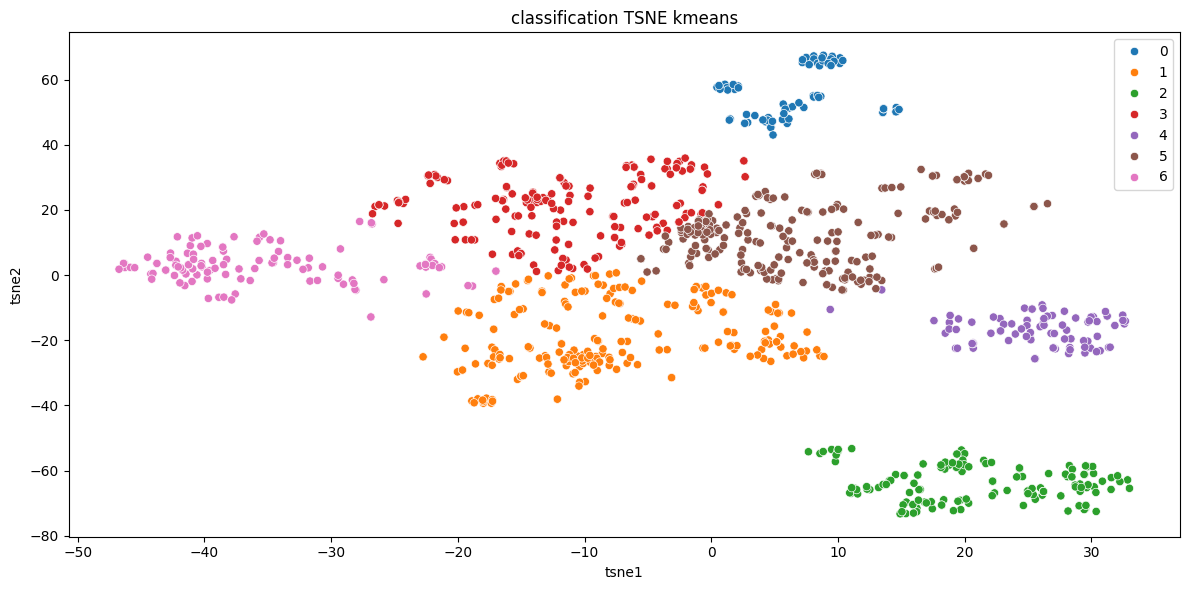

In [122]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
# Mesure ARI
ARI_count = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI_count

0.36585750171508147

### 3.3.2) Approche tf-idf

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
df.head(2)

product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                  Sathiyas Cotton Bath Towel   

                                  image product_category_tree  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg      Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590.jpg            Baby Care    

                                                                                                                                                                                                                                                 description  \
0  key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack curtain look interior curtain made high quality polyester fabric feature eyelet style sti...   
1  specification cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand type bath towel model name cotton bath towel ideal men woman boy girl model id color red yellow bl...   

   Longeur_list  label_categories  
0          1420                 4  
1           444                 0

#### Transformation Vectorielle

In [126]:
# assignation tf-idf
tfidf_vectorizer = TfidfVectorizer()

In [127]:
# transformation
tfidf_bow = tfidf_vectorizer.fit_transform(df["description"])

In [128]:
# mots
tfidf_vectorizer.get_feature_names_out()

array(['aa', 'ability', 'able', ..., 'zipper', 'zone', 'zoom'],
      dtype=object)

In [129]:
# dataframe
df_tfidf_bow = pd.DataFrame(tfidf_bow.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
df_tfidf_bow

aa  ability  able  abode  abrasion  abroad  absolute  absorbency  \
0     0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
1     0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
2     0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.075037   
3     0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
4     0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
...   ...      ...   ...    ...       ...     ...       ...         ...   
1045  0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
1046  0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
1047  0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
1048  0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   
1049  0.0      0.0   0.0    0.0       0.0     0.0       0.0    0.000000   

      absorbent  absorber  absorbing  abstract  accent  access  accessory  \
0           0.0       0.0        0.0  0.172577     0.0     0.0        0.0   
1           0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
2           0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
3           0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
4           0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
...         ...       ...        ...       ...     ...     ...        ...   
1045        0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
1046        0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
1047        0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
1048        0.0       0.0        0.0  0.000000     0.0     0.0        0.0   
1049        0.0       0.0        0.0  0.000000     0.0     0.0        0.0   

      accident  accidental  accommodate  according  acer  ache  aching  acid  \
0          0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
1          0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
2          0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
3          0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
4          0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
...        ...         ...          ...        ...   ...   ...     ...   ...   
1045       0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
1046       0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
1047       0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
1048       0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   
1049       0.0         0.0          0.0        0.0   0.0   0.0     0.0   0.0   

      acne  across  acrylic  act  active  actual  adapter  adaptor  add  \
0      0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
1      0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
2      0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
3      0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
4      0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
...    ...     ...      ...  ...     ...     ...      ...      ...  ...   
1045   0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
1046   0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
1047   0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
1048   0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   
1049   0.0     0.0      0.0  0.0     0.0     0.0      0.0      0.0  0.0   

      added  addiction  addition  additional  additionally  adhesive  adjust  \
0       0.0        0.0       0.0         0.0           0.0  0.000000     0.0   
1       0.0        0.0       0.0         0.0           0.0  0.000000     0.0   
2       0.0        0.0       0.0         0.0           0.0  0.000000     0.0   

In [130]:
# check
df_tfidf_bow[df_tfidf_bow["aa"]>0]["aa"]

441    0.094975
856    0.120477
Name: aa, dtype: float64

In [131]:
from sklearn.decomposition import PCA

In [132]:
# PCA pour simplification
pca = PCA()
pca.fit(df_tfidf_bow)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.05904836e-02 2.78573462e-02 2.59548125e-02 ... 3.72010997e-36
 1.89275441e-36 1.77703159e-37]
[4.18340704e-02 2.87108228e-02 2.67500005e-02 ... 3.83408446e-36
 1.95074349e-36 1.83147521e-37]


In [133]:
len(pca.explained_variance_ratio_)

1050

In [134]:
# dataframe ratio_var
cumul_ratio_var = pd.DataFrame({"variance_ratio" : pca.explained_variance_ratio_})
# ratio cumulé
cumul_ratio_var["cumul"] = cumul_ratio_var["variance_ratio"].cumsum()
cumul_ratio_var = cumul_ratio_var*100
# 90% de variance
cumul_ratio_var[cumul_ratio_var["cumul"] <=90]

variance_ratio      cumul
0          4.183407   4.183407
1          2.871082   7.054489
2          2.675000   9.729489
3          1.905653  11.635142
4          1.712905  13.348047
..              ...        ...
402        0.058935  89.720561
403        0.058771  89.779332
404        0.058673  89.838005
405        0.058519  89.896524
406        0.058410  89.954933

[407 rows x 2 columns]

#### Réduction de dimension PCA

In [135]:
# PCA final 90% de variance
pca = PCA(407)
pca.fit_transform(df_tfidf_bow)

array([[-0.12110884, -0.06889917, -0.05483673, ..., -0.0157583 ,
         0.01406078, -0.03737286],
       [-0.10624413, -0.13492899, -0.19967745, ..., -0.01531607,
        -0.01436885,  0.00840171],
       [-0.12249089, -0.06282706, -0.16646894, ..., -0.01118676,
        -0.01691193, -0.03740574],
       ...,
       [-0.04388723,  0.07716563,  0.00262195, ...,  0.00675006,
         0.01590506,  0.00535642],
       [-0.04979154,  0.09350414,  0.00330706, ...,  0.00723269,
        -0.00097436, -0.0077786 ],
       [-0.04379152,  0.11767321,  0.0126143 , ..., -0.01816326,
        -0.00721625, -0.00106103]])

In [136]:
# dataframe PCA
df_pca = pd.DataFrame(pca.fit_transform(df_tfidf_bow))
df_pca

0         1         2         3         4         5         6    \
0    -0.121109 -0.068899 -0.054837 -0.166291 -0.019253 -0.081648  0.028748   
1    -0.106244 -0.134929 -0.199677 -0.003599 -0.214618  0.583701  0.021646   
2    -0.122491 -0.062827 -0.166469  0.029291 -0.249068  0.509867  0.049164   
3    -0.127196 -0.098943 -0.143861 -0.105708 -0.028490 -0.000700  0.017941   
4    -0.136656 -0.096868 -0.133194 -0.116691 -0.043078  0.011974  0.026809   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.072291  0.002106 -0.020425 -0.103124  0.006712 -0.011504  0.031830   
1046 -0.100667 -0.023014  0.014359 -0.110410  0.009170 -0.008729  0.058877   
1047 -0.043887  0.077166  0.002622 -0.042620  0.016614 -0.009424  0.006603   
1048 -0.049792  0.093504  0.003307 -0.056608  0.020639 -0.010695  0.023786   
1049 -0.043792  0.117673  0.012614 -0.039102  0.028010 -0.013062  0.016588   

           7         8         9         10        11        12        13   \
0    -0.023480 -0.084055 -0.078279 -0.039339  0.182608 -0.011526  0.422719   
1    -0.037802  0.263448 -0.013068  0.092902  0.229247  0.033061  0.016769   
2    -0.026900  0.106053  0.013784 -0.012636  0.041342 -0.027406 -0.004991   
3     0.006826 -0.041015 -0.051342 -0.099737  0.245352 -0.125309 -0.157180   
4    -0.003792 -0.031585 -0.061991 -0.090577  0.206085 -0.109838 -0.148653   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.045165 -0.010461 -0.033718  0.047578 -0.045300  0.042627  0.042781   
1046 -0.061397 -0.020443 -0.059545  0.039144 -0.013156  0.018838  0.036608   
1047 -0.014758 -0.001410 -0.028705  0.063456 -0.010179  0.052906  0.021233   
1048 -0.030047 -0.011916 -0.042733  0.093603 -0.012491  0.085606  0.047682   
1049 -0.022539 -0.013440 -0.038776  0.083317 -0.005514  0.072667  0.027616   

           14        15        16        17        18        19        20   \
0     0.186740  0.140286 -0.016477  0.099160 -0.098373  0.009814  0.068227   
1     0.002879  0.204450 -0.036835 -0.034136 -0.065263 -0.043681  0.028587   
2    -0.023181  0.082156 -0.012297 -0.002876 -0.054856 -0.010129  0.003063   
3    -0.033058  0.039710 -0.081196 -0.075999 -0.080812  0.006339 -0.011358   
4    -0.066772  0.076508 -0.039762 -0.076425 -0.076119  0.037986 -0.005028   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.018972 -0.062814 -0.018989 -0.106428  0.220306 -0.001414  0.010539   
1046 -0.040381 -0.014937 -0.012560 -0.143099  0.187957  0.012975  0.030823   
1047  0.012454 -0.047180 -0.002418 -0.138581  0.247373 -0.007080  0.020169   
1048  0.006356 -0.057903 -0.005283 -0.293867  0.478697 -0.008369  0.036515   
1049  0.003393 -0.030132 -0.008487 -0.258533  0.396140 -0.006758  0.034525   

           21        22        23        24        25        26        27   \
0     0.263963  0.090975  0.046716  0.054686  0.022244  0.024103  0.032997   
1    -0.097732 -0.035208  0.031051  0.011329  0.078059 -0.074035 -0.017536   
2    -0.022269 -0.024251  0.018135 -0.022036 -0.032546 -0.008598 -0.003528   
3    -0.094300 -0.025329  0.041091 -0.184747 -0.076604  0.013659  0.273431   
4    -0.067544 -0.006628  0.030773 -0.202805 -0.046275  0.013304  0.297528   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.025149 -0.047577  0.141827 -0.003148  0.032550 -0.021468  0.149778   
1046  0.038935 -0.033323  0.172661 -0.059220  0.048590 -0.013010  0.156461   
1047  0.019407 -0.059733  0.160903  0.070713 -0.009614  0.030284  0.095840   
1048  0.042536 -0.147985  0.420355  0.142303 -0.014688  0.057995  0.191809   
1049  0.040675 -0.117544  0.332282  0.125357 -0.015565  0.053570  0.178512   

           28        29        30        31        32        33        34   \
0    -0.035863  0.001690 -0.026922  0.068194 -0.004430  0.059572 -0.021168   
1     0.011133 -0.014750  0.008203  0.010207 -0.030262  0.070020  0.126564   
2    -0.021306 -0.019885  0.0

In [137]:
# dataframe pce tfidf
df_tfidf_pca = df.merge(df_pca, left_index = True,  right_index = True)
df_tfidf_pca = df_tfidf_pca.drop(["description", "Longeur_list", "image"], axis = 1)

In [138]:
df_tfidf_pca

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories         0         1         2  \
0         Home Furnishing                  4 -0.121109 -0.068899 -0.054837   
1               Baby Care                  0 -0.106244 -0.134929 -0.199677   
2               Baby Care                  0 -0.122491 -0.062827 -0.166469   
3         Home Furnishing                  4 -0.127196 -0.098943 -0.143861   
4         Home Furnishing                  4 -0.136656 -0.096868 -0.133194   
...                    ...               ...       ...       ...       ...   
1045            Baby Care                  0 -0.072291  0.002106 -0.020425   
1046            Baby Care                  0 -0.100667 -0.023014  0.014359   
1047            Baby Care                  0 -0.043887  0.077166  0.002622   
1048            Baby Care                  0 -0.049792  0.093504  0.003307   
1049            Baby Care                  0 -0.043792  0.117673  0.012614   

             3         4         5         6         7         8         9  \
0    -0.166291 -0.019253 -0.081648  0.028748 -0.023480 -0.084055 -0.078279   
1    -0.003599 -0.214618  0.583701  0.021646 -0.037802  0.263448 -0.013068   
2     0.029291 -0.249068  0.509867  0.049164 -0.026900  0.106053  0.013784   
3    -0.105708 -0.028490 -0.000700  0.017941  0.006826 -0.041015 -0.051342   
4    -0.116691 -0.043078  0.011974  0.026809 -0.003792 -0.031585 -0.061991   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.103124  0.006712 -0.011504  0.031830 -0.045165 -0.010461 -0.033718   
1046 -0.110410  0.009170 -0.008729  0.058877 -0.061397 -0.020443 -0.059545   
1047 -0.042620  0.016614 -0.009424  0.006603 -0.014758 -0.001410 -0.028705   
1048 -0.056608  0.020639 -0.010695  0.023786 -0.030047 -0.011916 -0.042733   
1049 -0.039102  0.028010 -0.013062  0.016588 -0.022539 -0.013440 -0.038776   

            10        11        12        13        14        15        16  \
0    -0.039339  0.182608 -0.011526  0.422719  0.186740  0.140286 -0.016477   
1     0.092902  0.229247  0.033061  0.016769  0.002879  0.204450 -0.036835   
2    -0.012636  0.041342 -0.027406 -0.004991 -0.023181  0.082156 -0.012297   
3    -0.099737  0.245352 -0.125309 -0.157180 -0.033058  0.039710 -0.081196   
4    -0.090577  0.206085 -0.109838 -0.148653 -0.066772  0.076508 -0.039762   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.047578 -0.045300  0.042627  0.042781 -0.018972 -0.062814 -0.018989   
1046  0.039144 -0.013156  0.018838  0.036608 -0.040381 -0.014937 -0.012560   
1047  0.063456 -0.010179  0.052906  0.021233  0.012454 -0.047180 -0.002418   
1048  0.093603 -0.012491  0.085606  0.047682  0.006356 -0.057903 -0.005283   
1049  0.083317 -0.005514  0.072667  0.027616  0.003393 -0.030132 -0.008487   

            17        18        19        20        21        22        23  \
0     0.099160 -0.098373  0.009814  0.068227  0.263963  0.090975  0.046716   
1    -0.034136 -0.065263 -0.043681  0.028587 -0.097732 -0.035208  0.031051   
2    -0.002876 -0.054856 -0.010129  0.003063 -0.022269 -0.024251  0.018135   
3    -0.075999 -0.080812  0.006339 

#### Réduction T-SNE

In [139]:
from sklearn import manifold

In [140]:
# Mise en place TSNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(df_pca)

In [141]:
X_tsne 

array([[17.410917 , 26.159693 ],
       [ 4.8661904, 32.799072 ],
       [ 4.8416915, 28.491585 ],
       ...,
       [41.896744 , -9.945714 ],
       [40.055016 , -7.6505284],
       [40.309586 , -9.368619 ]], dtype=float32)

In [142]:
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne

tsne1      tsne2
0     17.410917  26.159693
1      4.866190  32.799072
2      4.841691  28.491585
3     33.235294  19.932348
4     33.139984  20.768557
...         ...        ...
1045  33.004139  -9.230915
1046  33.872120  -8.122766
1047  41.896744  -9.945714
1048  40.055016  -7.650528
1049  40.309586  -9.368619

[1050 rows x 2 columns]

In [143]:
df_tsne = df.merge(df_tsne, left_index = True,  right_index = True)

In [144]:
df_tsne = df_tsne.drop(["description", "Longeur_list", "image"], axis = 1)

In [145]:
df_tsne

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories      tsne1      tsne2  
0         Home Furnishing                  4  17.410917  26.159693  
1               Baby Care                  0   4.866190  32.799072  
2               Baby Care                  0   4.841691  28.491585  
3         Home Furnishing                  4  33.235294  19.932348  
4         Home Furnishing                  4  33.139984  20.768557  
...                    ...               ...        ...        ...  
1045            Baby Care                  0  33.004139  -9.230915  
1046            Baby Care                  0  33.872120  -8.122766  
1047            Baby Care                  0  41.896744  -9.945714  
1048            Baby Care                  0  40.055016  -7.650528  
1049            Baby Care                  0  40.309586  -9.368619  

[1050 rows x 5 columns]

#### Classification selon vraies catégories

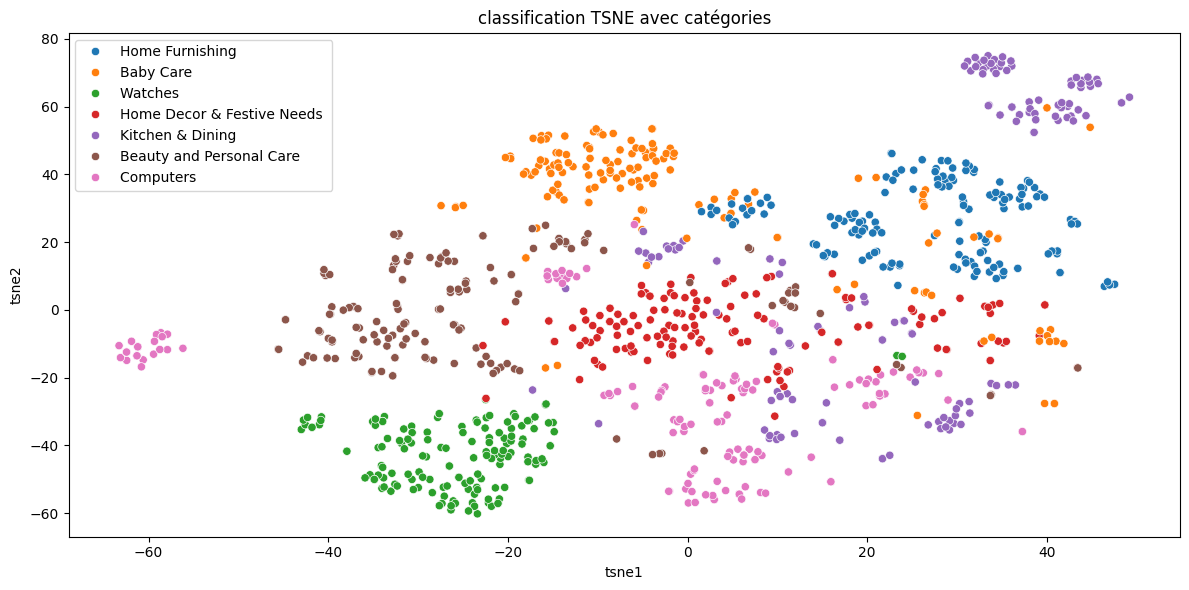

In [146]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

#### Classification avec KMEANS

In [147]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [148]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [149]:
df_tsne["clusters"] = kmeans.labels_

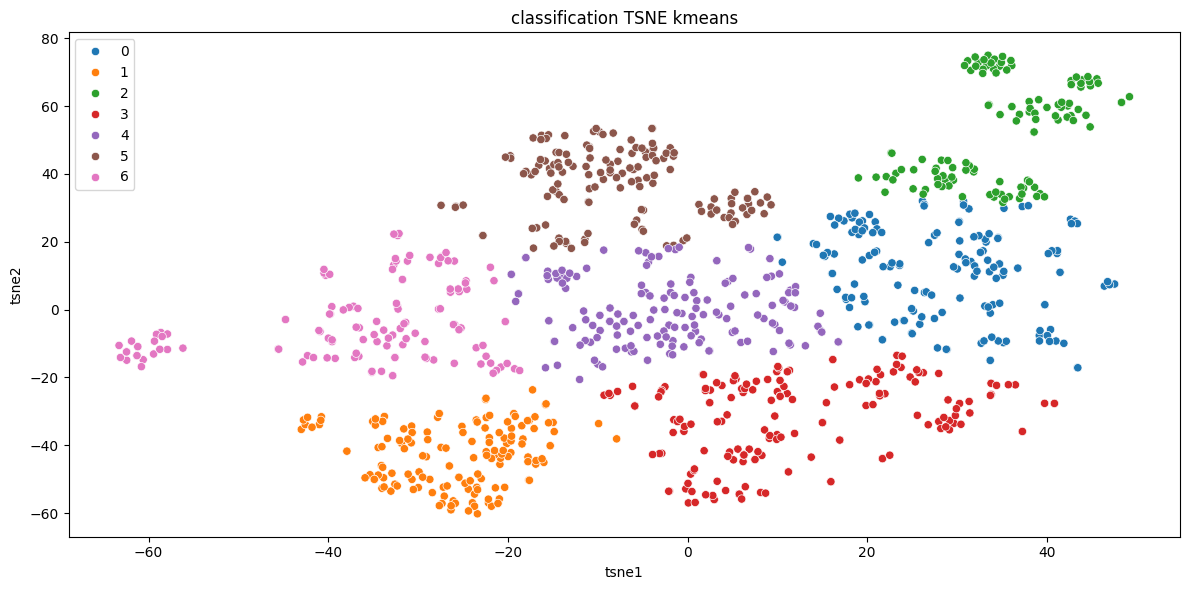

In [150]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [151]:
# Mesure ARI
ARI_tf_idf = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI_tf_idf

0.4768367458893424

## 3.4) word/sentence embedding

### 3.4.1) Approche avec Word2Vec

In [152]:
import gensim.models

In [153]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [154]:
# phrases
sentences = df["description"].apply(lambda x : x.split())

In [156]:
# Création du modèle
model = gensim.models.Word2Vec(min_count = 1, vector_size = 100)

In [157]:
# Bulding vacabulary table
model.build_vocab(sentences)

In [158]:
# entrainement du modèle
model.train(sentences, total_examples=model.corpus_count, epochs=30)
model_vectors = model.wv
model_words = model.wv.index_to_key
print(f"vocabulary size  {len(model_words)}")

vocabulary size  3169


In [159]:
# Préparation de sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
# Transformation en array
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     padding='post') 

In [160]:
len(x_sentences)

1050

In [161]:
# matrice embedding

w2v_size = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in model_words :
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
word_rate = np.round(j/i,4)
print(f"word embeding rate : {word_rate}")
print(f"Embeding matrix : {embedding_matrix.shape}")

word embeding rate : 1.0
Embeding matrix : (3170, 100)


In [162]:
# Création du modèle embedding

input=Input(shape=(len(x_sentences)),dtype='float64')
word_input=Input(shape=(304),dtype='float64') 
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix])(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 304)]             0         
                                                                 
 embedding (Embedding)       (None, 304, 100)          317000    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 317,000
Trainable params: 317,000
Non-trainable params: 0
_________________________________________________________________


In [163]:
# Exécution du modèle
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 100)

In [164]:
embeddings

array([[-0.29077962,  0.16906397,  0.05697401, ..., -0.13022418,
         0.00200711,  0.06986994],
       [-0.05755372,  0.01108636,  0.04254672, ..., -0.06703313,
        -0.00036161,  0.06456767],
       [-0.19215965,  0.00715905, -0.02977361, ..., -0.25336516,
         0.03182264,  0.21002884],
       ...,
       [-0.02412898,  0.01071129,  0.03016587, ..., -0.01542731,
         0.01239671,  0.0175887 ],
       [-0.04147636,  0.02002375,  0.04582247, ..., -0.02019795,
         0.01759712,  0.03630986],
       [-0.02205808,  0.00739013,  0.03212785, ..., -0.02083733,
         0.01532697,  0.02287899]], dtype=float32)

#### Réduction de dimension PCA

In [165]:
# PCA final 90% de variance
pca = PCA(n_components = 0.9)
pca.fit_transform(embeddings)

array([[ 1.097649  , -0.21440957, -0.25418988, ...,  0.02583301,
        -0.02026328, -0.02067385],
       [ 0.36012253, -0.52169573, -0.04360671, ...,  0.05168715,
        -0.0243096 , -0.09014422],
       [ 1.0107113 , -0.7032625 , -0.03755612, ...,  0.19361113,
        -0.12480099, -0.21721992],
       ...,
       [-0.27876687,  0.09877223,  0.01609457, ...,  0.03441495,
        -0.04567506,  0.05693121],
       [-0.23200966,  0.09491503,  0.01749288, ...,  0.04052752,
        -0.07772144,  0.07611457],
       [-0.26829574,  0.09542068,  0.01809979, ...,  0.03045028,
        -0.04352099,  0.05458377]], dtype=float32)

In [166]:
# dataframe PCA
df_pca = pd.DataFrame(pca.fit_transform(embeddings))
df_pca

0         1         2         3         4         5         6  \
0     1.097649 -0.214410 -0.254190  0.578836 -0.194806 -0.030052  0.158097   
1     0.360123 -0.521696 -0.043607  0.058933  0.043044 -0.153188 -0.063092   
2     1.010711 -0.703263 -0.037556  0.054530  0.380882 -0.329133 -0.070033   
3     0.883350 -0.822018 -0.025136  0.395979 -0.267732 -0.128535  0.331246   
4     1.265914 -0.838733 -0.098571  0.553851 -0.144564 -0.303417  0.571756   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.802015  0.712265  0.187647  0.716110  0.695921  0.531204 -0.001316   
1046  0.845875  0.537290 -0.089017  0.719956  0.293348 -0.029358  0.265950   
1047 -0.278767  0.098772  0.016095  0.062928 -0.014354 -0.059090  0.000097   
1048 -0.232010  0.094915  0.017493  0.125142 -0.019096 -0.070750 -0.015866   
1049 -0.268296  0.095421  0.018100  0.078606 -0.018590 -0.076281  0.009301   

             7         8         9  
0     0.025833 -0.020263 -0.020674  
1     0.051687 -0.024310 -0.090144  
2     0.193611 -0.124801 -0.217220  
3    -0.055247 -0.170658 -0.188101  
4    -0.043531 -0.138343 -0.177821  
...        ...       ...       ...  
1045  0.423136 -0.655000  0.531170  
1046  0.126599 -0.422223  0.486255  
1047  0.034415 -0.045675  0.056931  
1048  0.040528 -0.077721  0.076115  
1049  0.030450 -0.043521  0.054584  

[1050 rows x 10 columns]

In [167]:
# dataframe pca w2vec
df_w2vec_pca = df.merge(df_pca, left_index = True,  right_index = True)
df_w2vec_pca = df_w2vec_pca.drop(["description", "Longeur_list", "image"], axis = 1)

In [168]:
df_w2vec_pca

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories         0         1         2  \
0         Home Furnishing                  4  1.097649 -0.214410 -0.254190   
1               Baby Care                  0  0.360123 -0.521696 -0.043607   
2               Baby Care                  0  1.010711 -0.703263 -0.037556   
3         Home Furnishing                  4  0.883350 -0.822018 -0.025136   
4         Home Furnishing                  4  1.265914 -0.838733 -0.098571   
...                    ...               ...       ...       ...       ...   
1045            Baby Care                  0  0.802015  0.712265  0.187647   
1046            Baby Care                  0  0.845875  0.537290 -0.089017   
1047            Baby Care                  0 -0.278767  0.098772  0.016095   
1048            Baby Care                  0 -0.232010  0.094915  0.017493   
1049            Baby Care                  0 -0.268296  0.095421  0.018100   

             3         4         5         6         7         8         9  
0     0.578836 -0.194806 -0.030052  0.158097  0.025833 -0.020263 -0.020674  
1     0.058933  0.043044 -0.153188 -0.063092  0.051687 -0.024310 -0.090144  
2     0.054530  0.380882 -0.329133 -0.070033  0.193611 -0.124801 -0.217220  
3     0.395979 -0.267732 -0.128535  0.331246 -0.055247 -0.170658 -0.188101  
4     0.553851 -0.144564 -0.303417  0.571756 -0.043531 -0.138343 -0.177821  
...        ...       ...       ...       ...       ...       ...       ...  
1045  0.716110  0.695921  0.531204 -0.001316  0.423136 -0.655000  0.531170  
1046  0.719956  0.293348 -0.029358  0.265950  0.126599 -0.422223  0.486255  
1047  0.062928 -0.014354 -0.059090  0.000097  0.034415 -0.045675  0.056931  
1048  0.125142 -0.019096 -0.070750 -0.015866  0.040528 -0.077721  0.076115  
1049  0.078606 -0.018590 -0.076281  0.009301  0.030450 -0.043521  0.054584  

[1050 rows x 13 columns]

#### Réduction T-SNE

In [169]:
from sklearn import manifold

In [170]:
# Mise en place TSNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(df_pca)

In [171]:
X_tsne 

array([[ -7.337221  , -35.03658   ],
       [ -0.20947027, -31.122633  ],
       [  9.097964  , -46.64175   ],
       ...,
       [ -6.7289886 ,  14.071408  ],
       [ -7.7243056 ,  12.797592  ],
       [ -6.7324247 ,  13.800945  ]], dtype=float32)

In [172]:
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne

tsne1      tsne2
0     -7.337221 -35.036579
1     -0.209470 -31.122633
2      9.097964 -46.641750
3     -4.703367 -35.680279
4     -5.261075 -37.282154
...         ...        ...
1045 -16.609737 -32.942616
1046 -16.526583 -32.778942
1047  -6.728989  14.071408
1048  -7.724306  12.797592
1049  -6.732425  13.800945

[1050 rows x 2 columns]

In [173]:
df_tsne = df.merge(df_tsne, left_index = True,  right_index = True)

In [174]:
df_tsne = df_tsne.drop(["description", "Longeur_list", "image"], axis = 1)

In [175]:
df_tsne

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories      tsne1      tsne2  
0         Home Furnishing                  4  -7.337221 -35.036579  
1               Baby Care                  0  -0.209470 -31.122633  
2               Baby Care                  0   9.097964 -46.641750  
3         Home Furnishing                  4  -4.703367 -35.680279  
4         Home Furnishing                  4  -5.261075 -37.282154  
...                    ...               ...        ...        ...  
1045            Baby Care                  0 -16.609737 -32.942616  
1046            Baby Care                  0 -16.526583 -32.778942  
1047            Baby Care                  0  -6.728989  14.071408  
1048            Baby Care                  0  -7.724306  12.797592  
1049            Baby Care                  0  -6.732425  13.800945  

[1050 rows x 5 columns]

#### Classification selon vraies catégories

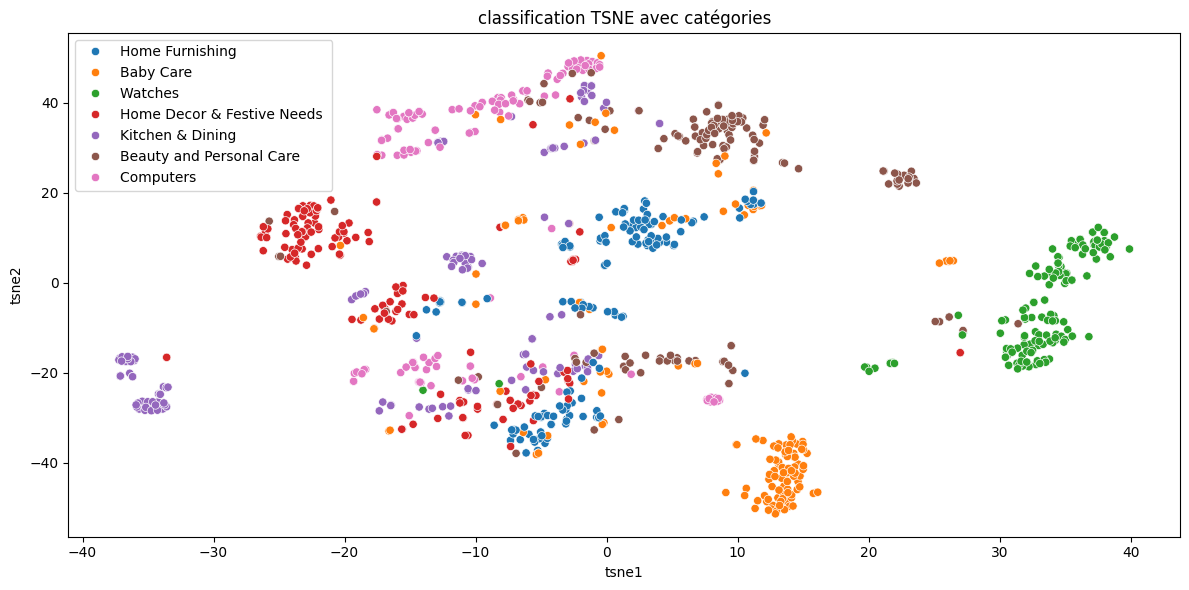

In [176]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

#### Classification avec KMEANS

In [177]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [178]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [179]:
df_tsne["clusters"] = kmeans.labels_

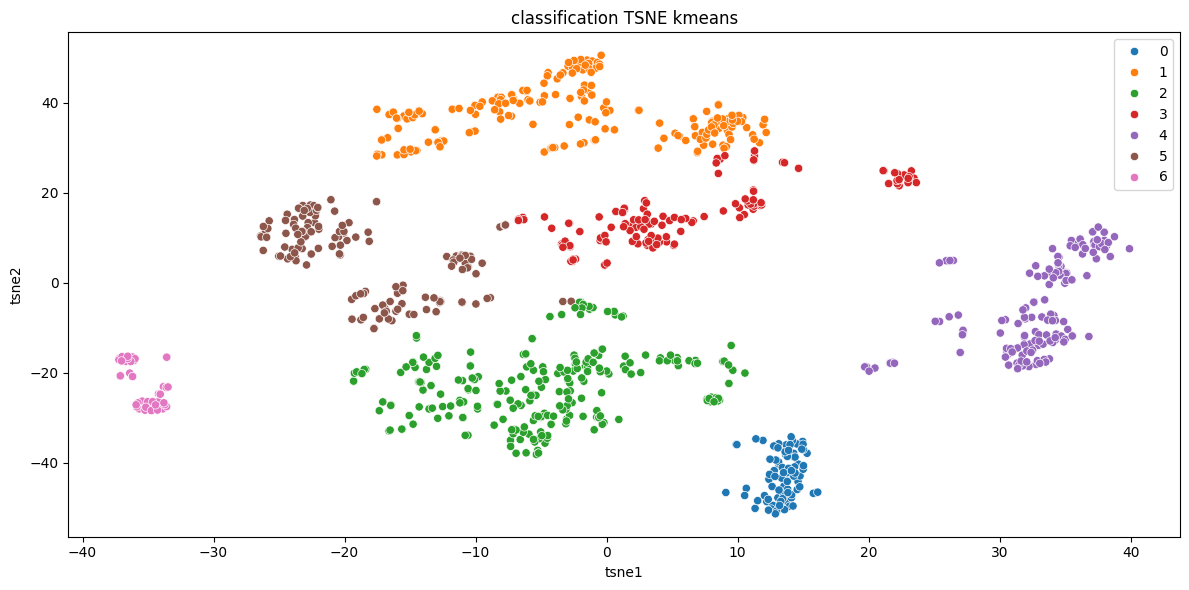

In [180]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [181]:
# Mesure ARI
ARI_w2vec = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI_w2vec

0.33785137089058004

### 3.4.2) Approche avec BERT

In [182]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers

C:\Users\ARMAN\anaconda3\envs\projet_6_OC\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [183]:
from transformers import TFAutoModel
from transformers import AutoTokenizer
import time

In [184]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [200]:
# Définition de max_length
df_temp_max_len = pd.DataFrame(sentences)
longueur_list_max_len = [len(row) for row in df_temp_max_len['description']] 
np.median(longueur_list_max_len)

17.0

In [201]:
# bert-base-uncased
max_length = 17
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df["description"].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [202]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 198ms/step
temps traitement :  31.0


In [205]:
features_bert

array([[ 0.07925332, -0.28557202,  0.51442194, ..., -0.01238227,
        -0.18217099, -0.0896503 ],
       [ 0.52838475, -0.09658634,  0.40608084, ..., -0.087974  ,
        -0.31741378,  0.32819045],
       [ 0.4222648 , -0.15502173,  0.552793  , ..., -0.31758347,
        -0.22672163,  0.04733119],
       ...,
       [ 0.39714456,  0.14593115,  0.25491232, ...,  0.40713808,
        -0.25743544,  0.14480747],
       [ 0.18334703, -0.05465791,  0.3810598 , ...,  0.48740253,
        -0.19020799, -0.5671405 ],
       [ 0.06611198, -0.19850606,  0.22787878, ...,  0.4434639 ,
        -0.17029816, -0.39232916]], dtype=float32)

In [206]:
last_hidden_states_tot

array([[[-6.05085552e-01, -6.07132256e-01, -2.25047246e-02, ...,
         -2.18652576e-01, -3.66604418e-01,  4.54413235e-01],
        [-3.37624192e-01, -5.55773228e-02, -7.71674141e-02, ...,
          1.11418515e-01,  5.55470824e-01, -1.28075600e-01],
        [ 4.38923538e-02, -1.57177567e-01,  8.27071309e-01, ...,
         -2.93734998e-01, -2.54746556e-01, -2.79967159e-01],
        ...,
        [ 5.82807541e-01, -3.79592866e-01,  6.05665028e-01, ...,
         -3.79355103e-01, -8.25527132e-01,  5.09817421e-01],
        [-1.30574918e+00, -1.34524143e+00,  1.21985763e-01, ...,
          3.70336846e-02, -5.31164348e-01, -2.77881593e-01],
        [ 6.74954772e-01, -1.05525121e-01, -3.08204442e-03, ...,
          2.67177969e-01, -7.32116580e-01, -1.03108279e-01]],

       [[-4.72623318e-01, -1.58254072e-01,  4.85245027e-02, ...,
         -1.52913049e-01, -1.58248857e-01,  3.94567937e-01],
        [ 3.36728752e-01, -3.21205705e-01, -2.24715799e-01, ...,
         -4.51607779e-02,  4.64510947e

#### Réduction de dimension PCA

In [207]:
# PCA final 90% de variance
pca = PCA(n_components = 0.9)
pca.fit_transform(features_bert)

array([[-2.1188285e+00, -1.5671512e+00, -2.5388823e+00, ...,
         7.0651852e-02,  1.6259560e-01, -1.1369250e-01],
       [-1.1829931e+00, -1.7522309e+00, -7.8061062e-01, ...,
        -8.6154737e-02,  3.5703385e-03,  1.0044250e-01],
       [-1.9800283e+00, -1.8086159e+00, -5.4744911e-01, ...,
         2.2024294e-02, -8.4776380e-05, -1.6740504e-01],
       ...,
       [-1.5198408e+00, -1.5914450e+00,  1.4016887e+00, ...,
        -6.3211673e-01,  3.4759908e-03,  2.7792388e-01],
       [-2.2829261e+00, -1.2250412e+00,  1.6787318e+00, ...,
        -1.0528493e-01, -8.7552838e-02,  3.5935234e-02],
       [ 4.3795314e-02, -1.2193999e+00,  1.2480271e+00, ...,
        -4.1993614e-02, -1.4061318e-01,  7.6057687e-02]], dtype=float32)

In [208]:
# dataframe PCA
df_pca = pd.DataFrame(pca.fit_transform(features_bert))
df_pca

0         1         2         3         4         5         6    \
0    -2.118829 -1.567151 -2.538882  0.299245 -1.089049 -0.387217 -0.022258   
1    -1.182993 -1.752231 -0.780611  0.529809  1.489449 -0.180054 -0.431927   
2    -1.980028 -1.808616 -0.547449 -0.092826  0.657520  0.234952 -0.109472   
3    -1.082198 -1.065582 -0.269855 -1.985102 -0.548798  0.210309 -1.114872   
4    -1.998817 -1.240939 -1.006377 -0.148943 -1.071425  0.194377 -2.151752   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -1.818441 -1.490518  1.810730  0.530975 -0.512000  0.625444  0.519682   
1046 -3.560802 -0.302747  0.545099  1.331575 -1.347084  0.477362  1.372676   
1047 -1.519841 -1.591445  1.401689  1.349834 -0.266497  0.628401 -1.025871   
1048 -2.282926 -1.225041  1.678732  1.478624 -1.456795  1.186643 -0.522302   
1049  0.043795 -1.219400  1.248027  0.587696 -0.880115  1.011212 -0.605845   

           7         8         9         10        11        12        13   \
0     0.711774 -0.561272 -0.009535 -2.361263 -1.130837 -1.067980  0.175047   
1    -0.125374  1.623406 -0.560221  0.940953 -0.262535 -1.053645 -0.661347   
2    -0.543412  1.109447 -0.777835  1.060072  0.175306 -0.403136 -0.202436   
3    -0.010076 -0.248503  0.863934  1.011201  1.008301 -0.933659 -1.344915   
4     1.173051 -1.011987  0.787311  1.877142  0.344894 -0.878877 -0.645598   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.191189 -0.682612  0.010100  1.600298 -0.593665  2.296395 -0.140660   
1046  0.658725 -0.883460  0.888995  0.054742 -0.560857  2.624453 -0.607526   
1047  1.402645  0.756824 -1.533706  1.088307  0.016268  1.604190  0.056248   
1048  1.025729  0.093611  0.650105  1.141698 -0.771600  1.996926 -0.287262   
1049  0.294698  0.063464  0.971250  0.803412 -0.497507  1.724377 -0.585416   

           14        15        16        17        18        19        20   \
0     0.160764 -0.329531  0.185017 -0.063168 -0.129463  0.152641  0.190538   
1    -0.613969  0.594697  0.788885 -0.732902 -0.277762 -1.228577 -0.892808   
2     0.005851  1.109457  0.276543 -0.694892 -0.141203 -1.379591 -0.191201   
3    -0.081405 -0.350569  0.083504 -0.472717  1.128270 -0.666447 -0.121867   
4     0.598757  0.576168 -1.436076 -0.537746  1.658426 -0.168647  0.028488   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.452826  0.049752 -0.433399 -0.155248 -0.225151  0.245812  0.315441   
1046  1.081721  0.414387 -0.191309  0.243242 -0.304162  0.061394  0.038625   
1047  0.712447 -0.401488 -0.342800 -0.774278 -1.586075  0.982072 -0.250913   
1048  1.353464  0.940138 -0.046588 -0.072166 -0.874214  1.945490 -0.629139   
1049  1.253144  0.754565 -0.251495  0.508129 -0.568258  1.573431 -0.475978   

           21        22        23        24        25        26        27   \
0    -0.467263 -0.907252 -0.702557  0.180993  0.227505 -0.740844 -0.016159   
1     0.131892 -0.630185 -0.163768 -0.322980 -0.446439  1.086475 -0.527061   
2    -0.408146 -0.320705 -0.053194 -0.345135 -0.292349  0.576512 -0.132029   
3    -0.219639  0.714801  0.637657 -0.001554 -0.001360 -0.147708 -0.210064   
4    -0.237944  0.082551 -0.334769  0.153228 -0.220404 -1.026243 -0.113688   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.079466  0.258789 -0.071098 -0.498017 -1.740632  0.347846  0.370307   
1046 -0.434556  0.877955 -0.208472  1.085834 -1.059564 -0.069522  0.609601   
1047 -0.872199  0.243935 -0.359950 -0.532003 -0.815256 -0.765348 -0.316514   
1048 -0.701821  0.354426 -0.254550  1.144595 -1.760320 -0.160858  0.857651   
1049 -0.603048  0.375362 -0.272042  0.853908 -1.065385  0.002565  0.495730   

           28        29        30        31        32        33        34   \
0    -0.720243  0.441951 -0.566384  0.723471  0.306747  0.046203  0.336482   
1    -0.072605  0.206560  0.177379  1.045040  0.003988 -0.201524 -0.196543   
2    -0.644037 -0.489581 -0.0

In [209]:
# dataframe pca BERT
df_BERT_pca = df.merge(df_pca, left_index = True,  right_index = True)
df_BERT_pca = df_BERT_pca.drop(["description", "Longeur_list", "image"], axis = 1)

In [210]:
df_BERT_pca

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories         0         1         2  \
0         Home Furnishing                  4 -2.118829 -1.567151 -2.538882   
1               Baby Care                  0 -1.182993 -1.752231 -0.780611   
2               Baby Care                  0 -1.980028 -1.808616 -0.547449   
3         Home Furnishing                  4 -1.082198 -1.065582 -0.269855   
4         Home Furnishing                  4 -1.998817 -1.240939 -1.006377   
...                    ...               ...       ...       ...       ...   
1045            Baby Care                  0 -1.818441 -1.490518  1.810730   
1046            Baby Care                  0 -3.560802 -0.302747  0.545099   
1047            Baby Care                  0 -1.519841 -1.591445  1.401689   
1048            Baby Care                  0 -2.282926 -1.225041  1.678732   
1049            Baby Care                  0  0.043795 -1.219400  1.248027   

             3         4         5         6         7         8         9  \
0     0.299245 -1.089049 -0.387217 -0.022258  0.711774 -0.561272 -0.009535   
1     0.529809  1.489449 -0.180054 -0.431927 -0.125374  1.623406 -0.560221   
2    -0.092826  0.657520  0.234952 -0.109472 -0.543412  1.109447 -0.777835   
3    -1.985102 -0.548798  0.210309 -1.114872 -0.010076 -0.248503  0.863934   
4    -0.148943 -1.071425  0.194377 -2.151752  1.173051 -1.011987  0.787311   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.530975 -0.512000  0.625444  0.519682 -0.191189 -0.682612  0.010100   
1046  1.331575 -1.347084  0.477362  1.372676  0.658725 -0.883460  0.888995   
1047  1.349834 -0.266497  0.628401 -1.025871  1.402645  0.756824 -1.533706   
1048  1.478624 -1.456795  1.186643 -0.522302  1.025729  0.093611  0.650105   
1049  0.587696 -0.880115  1.011212 -0.605845  0.294698  0.063464  0.971250   

            10        11        12        13        14        15        16  \
0    -2.361263 -1.130837 -1.067980  0.175047  0.160764 -0.329531  0.185017   
1     0.940953 -0.262535 -1.053645 -0.661347 -0.613969  0.594697  0.788885   
2     1.060072  0.175306 -0.403136 -0.202436  0.005851  1.109457  0.276543   
3     1.011201  1.008301 -0.933659 -1.344915 -0.081405 -0.350569  0.083504   
4     1.877142  0.344894 -0.878877 -0.645598  0.598757  0.576168 -1.436076   
...        ...       ...       ...       ...       ...       ...       ...   
1045  1.600298 -0.593665  2.296395 -0.140660  0.452826  0.049752 -0.433399   
1046  0.054742 -0.560857  2.624453 -0.607526  1.081721  0.414387 -0.191309   
1047  1.088307  0.016268  1.604190  0.056248  0.712447 -0.401488 -0.342800   
1048  1.141698 -0.771600  1.996926 -0.287262  1.353464  0.940138 -0.046588   
1049  0.803412 -0.497507  1.724377 -0.585416  1.253144  0.754565 -0.251495   

            17        18        19        20        21        22        23  \
0    -0.063168 -0.129463  0.152641  0.190538 -0.467263 -0.907252 -0.702557   
1    -0.732902 -0.277762 -1.228577 -0.892808  0.131892 -0.630185 -0.163768   
2    -0.694892 -0.141203 -1.379591 -0.191201 -0.408146 -0.320705 -0.053194   
3    -0.472717  1.128270 -0.666447 

#### Réduction T-SNE

In [211]:
from sklearn import manifold

In [212]:
# Mise en place TSNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(df_pca)

In [213]:
X_tsne 

array([[-15.220612 ,  33.328686 ],
       [  8.707923 ,   4.6236176],
       [  8.092108 ,   3.6451256],
       ...,
       [-15.788119 ,  -0.8972835],
       [-14.2620125,  -3.6242428],
       [-14.744116 ,  -2.3859415]], dtype=float32)

In [214]:
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne

tsne1      tsne2
0    -15.220612  33.328686
1      8.707923   4.623618
2      8.092108   3.645126
3     11.917734 -11.537985
4     13.647125 -10.969759
...         ...        ...
1045 -13.493115  -1.858912
1046 -12.618176  -3.695154
1047 -15.788119  -0.897283
1048 -14.262012  -3.624243
1049 -14.744116  -2.385942

[1050 rows x 2 columns]

In [215]:
df_tsne = df.merge(df_tsne, left_index = True,  right_index = True)

In [216]:
df_tsne = df_tsne.drop(["description", "Longeur_list", "image"], axis = 1)

In [217]:
df_tsne

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories      tsne1      tsne2  
0         Home Furnishing                  4 -15.220612  33.328686  
1               Baby Care                  0   8.707923   4.623618  
2               Baby Care                  0   8.092108   3.645126  
3         Home Furnishing                  4  11.917734 -11.537985  
4         Home Furnishing                  4  13.647125 -10.969759  
...                    ...               ...        ...        ...  
1045            Baby Care                  0 -13.493115  -1.858912  
1046            Baby Care                  0 -12.618176  -3.695154  
1047            Baby Care                  0 -15.788119  -0.897283  
1048            Baby Care                  0 -14.262012  -3.624243  
1049            Baby Care                  0 -14.744116  -2.385942  

[1050 rows x 5 columns]

#### Classification selon vraies catégories

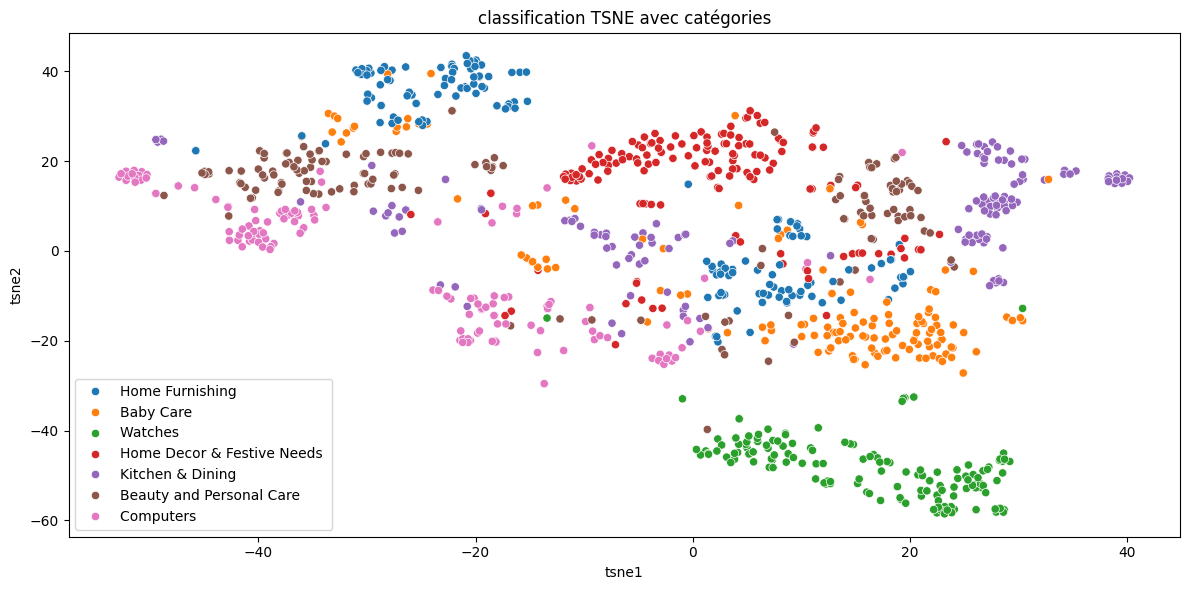

In [218]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

#### Classification avec KMEANS

In [219]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [220]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [221]:
df_tsne["clusters"] = kmeans.labels_

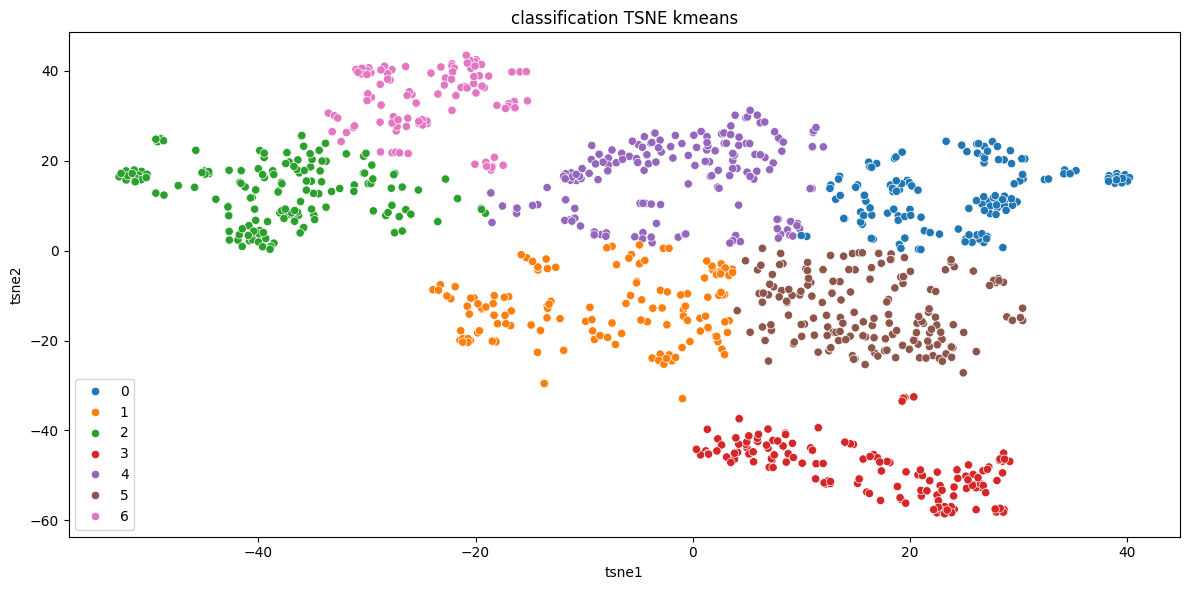

In [222]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [223]:
# Mesure ARI
ARI_BERT = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI_BERT

0.40090123767168906

In [224]:
# bert hub tensor flow

In [225]:
import tensorflow_hub as hub
import tensorflow_text 
# pas de modèle à valeur ajouté trouvé

### 3.4.3) Approche avec USE

In [226]:
import tensorflow_hub as hub

In [227]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [228]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [229]:
batch_size = 10
sentences = df["description"].to_list()

In [230]:
features_USE = feature_USE_fct(sentences, batch_size)

#### Réduction de dimension PCA

In [231]:
# PCA final 90% de variance
pca = PCA(n_components = 0.9)
pca.fit_transform(features_USE)

array([[-4.22024757e-01, -7.20237121e-02, -9.06576309e-03, ...,
        -4.71583987e-03,  8.46369099e-03, -6.75666888e-05],
       [-3.77560198e-01, -1.17733404e-01, -8.11488777e-02, ...,
        -5.88298850e-02,  9.38633736e-03,  8.31253827e-03],
       [-3.42629850e-01, -9.45971832e-02, -4.73336456e-03, ...,
        -4.42809658e-03, -2.11342033e-02,  7.25845015e-03],
       ...,
       [ 2.62886323e-02, -2.00346291e-01,  1.13736711e-01, ...,
        -5.47567941e-02,  3.08829192e-02, -8.74684844e-03],
       [-2.23263539e-02, -3.47831100e-01,  1.31704301e-01, ...,
        -1.45799778e-02, -2.82655749e-02,  2.55667549e-02],
       [ 1.35081159e-02, -3.43754619e-01,  1.11926660e-01, ...,
        -4.64775646e-03,  1.77296028e-02,  7.70319952e-03]], dtype=float32)

In [232]:
# dataframe PCA
df_pca = pd.DataFrame(pca.fit_transform(features_USE))
df_pca

0         1         2         3         4         5         6    \
0    -0.422025 -0.072024 -0.009066  0.042900  0.060146 -0.033883  0.149753   
1    -0.377560 -0.117733 -0.081149 -0.123663  0.010743 -0.062804 -0.113205   
2    -0.342630 -0.094597 -0.004733 -0.106505  0.209270 -0.180121 -0.150108   
3    -0.441953 -0.139757 -0.144320 -0.070270  0.017814  0.016821 -0.016426   
4    -0.439592 -0.188248 -0.103788 -0.053941  0.104008 -0.011419 -0.039885   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.205819 -0.042412  0.191324 -0.079094  0.364542 -0.070586 -0.062202   
1046 -0.310545 -0.112863  0.281986 -0.145424  0.132538 -0.031579  0.065764   
1047  0.026289 -0.200346  0.113737 -0.105185  0.120932  0.018047 -0.022371   
1048 -0.022326 -0.347831  0.131704  0.003520  0.105795  0.058320 -0.024946   
1049  0.013508 -0.343755  0.111927  0.013630  0.134499  0.040996 -0.019517   

           7         8         9         10        11        12        13   \
0    -0.209775 -0.005385 -0.215478  0.012375  0.159247 -0.123423  0.052274   
1     0.095020  0.333114  0.194545 -0.144846  0.133232 -0.007978  0.028556   
2    -0.028444  0.286443  0.070718 -0.036558  0.090023 -0.064221 -0.031324   
3    -0.135475  0.157366  0.061542  0.109228  0.049507 -0.128889 -0.017539   
4    -0.180297  0.170787  0.079199  0.121365  0.030025 -0.171745  0.010040   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.078430  0.103861 -0.096924  0.143993  0.015627  0.093864  0.124044   
1046  0.000197  0.111746 -0.104729  0.260422 -0.012329  0.009926  0.126030   
1047  0.320122  0.151070 -0.160290  0.389531 -0.174325  0.075169  0.107355   
1048  0.261408  0.162726 -0.171430  0.355923 -0.089643  0.162770  0.214172   
1049  0.258778  0.157612 -0.170680  0.411906 -0.073701  0.142396  0.165820   

           14        15        16        17        18        19        20   \
0     0.070134 -0.025033 -0.161072  0.186157  0.000734  0.024601  0.044519   
1     0.095564  0.131833 -0.039606  0.080905 -0.110401 -0.065845  0.042993   
2    -0.020146  0.074650 -0.033830  0.095568 -0.030027 -0.064493  0.058662   
3     0.096529  0.157833  0.027231  0.068992  0.070239 -0.088217  0.057925   
4     0.078658  0.089425  0.010948  0.055959  0.087397 -0.060115  0.030610   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.019891  0.076497  0.081778  0.092458 -0.022848 -0.154711 -0.058662   
1046  0.135005 -0.072853  0.018346  0.168171  0.156687  0.001762  0.199455   
1047  0.152772 -0.079357  0.004285  0.127486  0.149165  0.050083  0.155613   
1048  0.115532  0.078984  0.021177  0.191235  0.194227  0.056278  0.264308   
1049  0.157460 -0.027068  0.002936  0.174813  0.187405  0.003697  0.229940   

           21        22        23        24        25        26        27   \
0    -0.007941  0.130366  0.069876 -0.098303 -0.092340 -0.014810 -0.010486   
1     0.062844 -0.101415 -0.048279  0.033092 -0.060128 -0.010964 -0.031330   
2    -0.089356 -0.181364 -0.095106  0.009026 -0.016496 -0.003728  0.015006   
3    -0.036104 -0.062835 -0.077849  0.040406  0.098685  0.072217  0.005888   
4    -0.093383 -0.122917 -0.097367  0.061673  0.075643  0.133383 -0.054705   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.090549  0.098827 -0.116647  0.092785  0.028932 -0.010668 -0.085153   
1046  0.096267 -0.056190  0.009608 -0.020158  0.080163  0.011103 -0.113200   
1047  0.108729  0.070724  0.128340  0.115155 -0.011405 -0.041151 -0.066949   
1048  0.080467  0.056770  0.144607  0.119959 -0.014442  0.008285 -0.122067   
1049  0.085786  0.058733  0.139591  0.076034  0.019814 -0.020214 -0.082681   

           28        29        30        31        32        33        34   \
0    -0.052428 -0.056189  0.146139  0.046873 -0.133251 -0.046049 -0.076665   
1    -0.011795 -0.085463  0.037130 -0.030874 -0.058346 -0.077052  0.069455   
2    -0.019747 -0.053048  0.0

In [233]:
# dataframe pca w2vec
df_USE_pca = df.merge(df_pca, left_index = True,  right_index = True)
df_USE_pca = df_USE_pca.drop(["description", "Longeur_list", "image"], axis = 1)

In [234]:
df_USE_pca

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories         0         1         2  \
0         Home Furnishing                  4 -0.422025 -0.072024 -0.009066   
1               Baby Care                  0 -0.377560 -0.117733 -0.081149   
2               Baby Care                  0 -0.342630 -0.094597 -0.004733   
3         Home Furnishing                  4 -0.441953 -0.139757 -0.144320   
4         Home Furnishing                  4 -0.439592 -0.188248 -0.103788   
...                    ...               ...       ...       ...       ...   
1045            Baby Care                  0 -0.205819 -0.042412  0.191324   
1046            Baby Care                  0 -0.310545 -0.112863  0.281986   
1047            Baby Care                  0  0.026289 -0.200346  0.113737   
1048            Baby Care                  0 -0.022326 -0.347831  0.131704   
1049            Baby Care                  0  0.013508 -0.343755  0.111927   

             3         4         5         6         7         8         9  \
0     0.042900  0.060146 -0.033883  0.149753 -0.209775 -0.005385 -0.215478   
1    -0.123663  0.010743 -0.062804 -0.113205  0.095020  0.333114  0.194545   
2    -0.106505  0.209270 -0.180121 -0.150108 -0.028444  0.286443  0.070718   
3    -0.070270  0.017814  0.016821 -0.016426 -0.135475  0.157366  0.061542   
4    -0.053941  0.104008 -0.011419 -0.039885 -0.180297  0.170787  0.079199   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.079094  0.364542 -0.070586 -0.062202 -0.078430  0.103861 -0.096924   
1046 -0.145424  0.132538 -0.031579  0.065764  0.000197  0.111746 -0.104729   
1047 -0.105185  0.120932  0.018047 -0.022371  0.320122  0.151070 -0.160290   
1048  0.003520  0.105795  0.058320 -0.024946  0.261408  0.162726 -0.171430   
1049  0.013630  0.134499  0.040996 -0.019517  0.258778  0.157612 -0.170680   

            10        11        12        13        14        15        16  \
0     0.012375  0.159247 -0.123423  0.052274  0.070134 -0.025033 -0.161072   
1    -0.144846  0.133232 -0.007978  0.028556  0.095564  0.131833 -0.039606   
2    -0.036558  0.090023 -0.064221 -0.031324 -0.020146  0.074650 -0.033830   
3     0.109228  0.049507 -0.128889 -0.017539  0.096529  0.157833  0.027231   
4     0.121365  0.030025 -0.171745  0.010040  0.078658  0.089425  0.010948   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.143993  0.015627  0.093864  0.124044 -0.019891  0.076497  0.081778   
1046  0.260422 -0.012329  0.009926  0.126030  0.135005 -0.072853  0.018346   
1047  0.389531 -0.174325  0.075169  0.107355  0.152772 -0.079357  0.004285   
1048  0.355923 -0.089643  0.162770  0.214172  0.115532  0.078984  0.021177   
1049  0.411906 -0.073701  0.142396  0.165820  0.157460 -0.027068  0.002936   

            17        18        19        20        21        22        23  \
0     0.186157  0.000734  0.024601  0.044519 -0.007941  0.130366  0.069876   
1     0.080905 -0.110401 -0.065845  0.042993  0.062844 -0.101415 -0.048279   
2     0.095568 -0.030027 -0.064493  0.058662 -0.089356 -0.181364 -0.095106   
3     0.068992  0.070239 -0.088217 

#### Réduction T-SNE

In [235]:
from sklearn import manifold

In [236]:
# Mise en place TSNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(df_pca)

In [237]:
X_tsne 

array([[  7.624865 ,  26.166885 ],
       [ -2.3554866,  28.298563 ],
       [ -3.0176315,  28.797369 ],
       ...,
       [-10.488596 ,  20.612747 ],
       [-10.830466 ,  21.964596 ],
       [-11.300178 ,  21.157612 ]], dtype=float32)

In [238]:
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne

tsne1      tsne2
0      7.624865  26.166885
1     -2.355487  28.298563
2     -3.017632  28.797369
3      3.427353  18.962753
4      3.052262  18.966494
...         ...        ...
1045  -7.338519   6.504508
1046  -8.205709  18.902325
1047 -10.488596  20.612747
1048 -10.830466  21.964596
1049 -11.300178  21.157612

[1050 rows x 2 columns]

In [239]:
df_tsne = df.merge(df_tsne, left_index = True,  right_index = True)

In [240]:
df_tsne = df_tsne.drop(["description", "Longeur_list", "image"], axis = 1)

In [241]:
df_tsne

product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

     product_category_tree  label_categories      tsne1      tsne2  
0         Home Furnishing                  4   7.624865  26.166885  
1               Baby Care                  0  -2.355487  28.298563  
2               Baby Care                  0  -3.017632  28.797369  
3         Home Furnishing                  4   3.427353  18.962753  
4         Home Furnishing                  4   3.052262  18.966494  
...                    ...               ...        ...        ...  
1045            Baby Care                  0  -7.338519   6.504508  
1046            Baby Care                  0  -8.205709  18.902325  
1047            Baby Care                  0 -10.488596  20.612747  
1048            Baby Care                  0 -10.830466  21.964596  
1049            Baby Care                  0 -11.300178  21.157612  

[1050 rows x 5 columns]

#### Classification selon vraies catégories

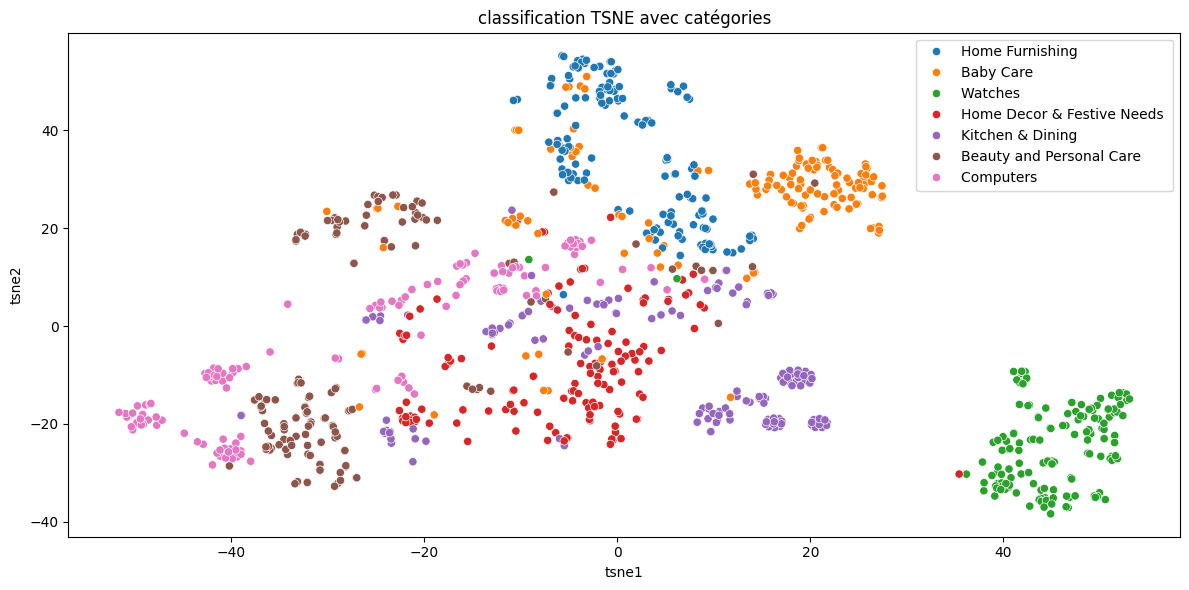

In [242]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

#### Classification avec KMEANS

In [243]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [244]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [245]:
df_tsne["clusters"] = kmeans.labels_

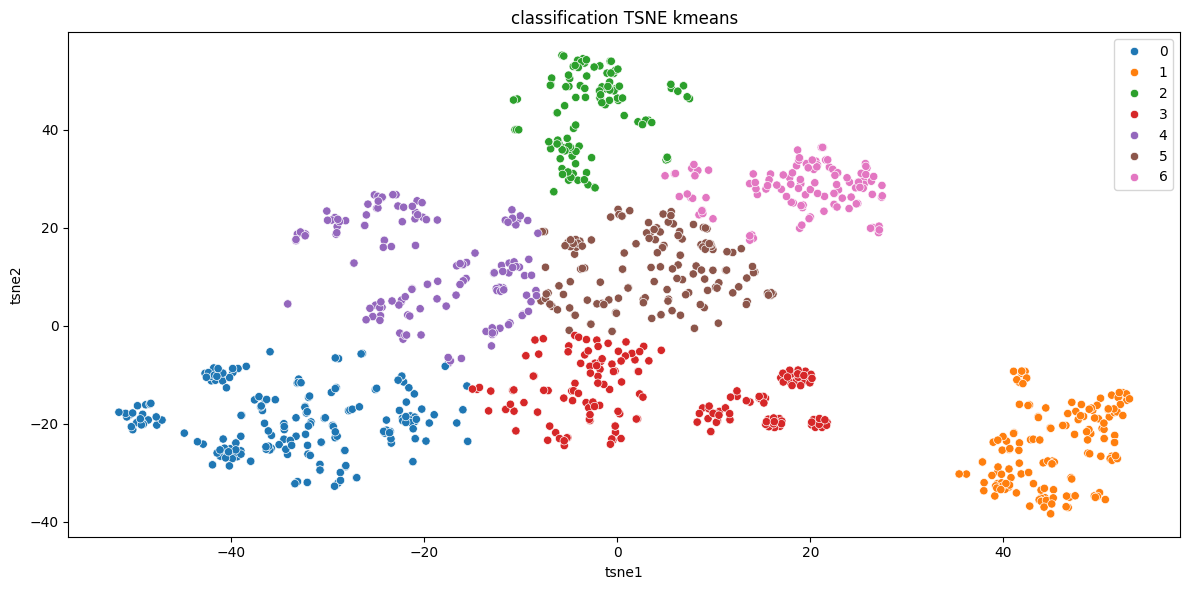

In [246]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [247]:
# Mesure ARI
ARI_USE = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI_USE

0.3834655796223837

## 3.5) Faisabilité classifiation supervisée à partir du texte

In [248]:
bilan_ari = pd.DataFrame({"ARI" :[ARI_count,ARI_tf_idf,ARI_w2vec,ARI_BERT,ARI_USE]}, index = ["ARI_count","ARI_tf_idf","ARI_w2vec","ARI_BERT","ARI_USE"])
bilan_ari

ARI
ARI_count   0.365858
ARI_tf_idf  0.476837
ARI_w2vec   0.337851
ARI_BERT    0.400901
ARI_USE     0.383466